<a href="https://colab.research.google.com/github/Rahul-Chouhan-407/Walmart_Capstone_Project/blob/main/Capstone_Project_Final_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project - Walmart**

---



## **Problem Statement**

A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply. You are a data scientist, who has to come up with useful insights using the data and make prediction models to forecast the sales for X number of months/years.


Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.

1.   Using the above data, come up with useful insights that can be used by each of the stores to improve in various areas.

2.   Forecast the sales for each store for the next 12 weeks.

## **Dataset Description**
The file Walmart.csv was obtained from Kaggle website. It consists of Walmart’s weekly sales from 2010-02-05 to 2012-11-01. The file has the following columns:

1. Store: the store number

2. Date: the week of sales

3. Weekly_Sales: sales for the given store

4. Holiday_Flag: whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

5. Temperature: Temperature on the day of sale

6. Fuel_Price: Cost of fuel in the region

7. CPI: Prevailing consumer price index

8. Unemployment: Prevailing unemployment rate in percentage

**Holiday Events include:**

*   Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
*   Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
*   Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
*   Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13



## **Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# overriding matplotlib
sns.set()
from datetime import datetime as dt

In [2]:
# import the preprocessing classes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import train/test split module
from sklearn.model_selection import train_test_split

# import the regressors
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# import metrics
from sklearn.metrics import mean_squared_error

# import warnings
import warnings
warnings.filterwarnings('ignore')

## **Importing the Dataset**

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Intellipaat Capstone Project - Walmart/Walmart.csv", index_col = 'Date', parse_dates = True)
df_saved = df.copy()

## **Understanding the Dataset**

In [6]:
df.head(10)

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-05-02      1    1643690.90             0        42.31       2.572   
2010-12-02      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-05-03      1    1554806.68             0        46.50       2.625   
2010-12-03      1    1439541.59             0        57.79       2.667   
2010-03-19      1    1472515.79             0        54.58       2.720   
2010-03-26      1    1404429.92             0        51.45       2.732   
2010-02-04      1    1594968.28             0        62.27       2.719   
2010-09-04      1    1545418.53             0        65.86       2.770   

                   CPI  Unemployment  
Date                                  
2010-05-02  211.096358         8.106  
2010-12-02  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-05-03  211.350143         8.106  
2010-12-03  211.380643         8.106  
2010-03-19  211.215635         8.106  
2010-03-26  211.018042         8.106  
2010-02-04  210.820450         7.808  
2010-09-04  210.622857         7.808

In [7]:
df.tail(10)

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2012-08-24     45     718232.26             0        72.62       3.834   
2012-08-31     45     734297.87             0        75.09       3.867   
2012-07-09     45     766512.66             1        75.70       3.911   
2012-09-14     45     702238.27             0        67.87       3.948   
2012-09-21     45     723086.20             0        65.32       4.038   
2012-09-28     45     713173.95             0        64.88       3.997   
2012-05-10     45     733455.07             0        64.89       3.985   
2012-12-10     45     734464.36             0        54.47       4.000   
2012-10-19     45     718125.53             0        56.47       3.969   
2012-10-26     45     760281.43             0        58.85       3.882   

                   CPI  Unemployment  
Date                                  
2012-08-24  191.344887         8.684  
2012-08-31  191.461281         8.684  
2012-07-09  191.577676         8.684  
2012-09-14  191.699850         8.684  
2012-09-21  191.856704         8.684  
2012-09-28  192.013558         8.684  
2012-05-10  192.170412         8.667  
2012-12-10  192.327265         8.667  
2012-10-19  192.330854         8.667  
2012-10-26  192.308899         8.667

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-05-02 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


In [9]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [10]:
df.shape

(6435, 7)


## **Data Preprocessing and Cleaning**

**Checking for Missing Values**

In [11]:
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

**No Missing Values found.**

---



**Checking for Duplicates**

In [12]:
# Check for duplicates
duplicates = df.duplicated()
print(duplicates)
# Count the number of duplicates
num_duplicates = duplicates.sum()
print("Number of duplicates:", num_duplicates)

Date
2010-05-02    False
2010-12-02    False
2010-02-19    False
2010-02-26    False
2010-05-03    False
              ...  
2012-09-28    False
2012-05-10    False
2012-12-10    False
2012-10-19    False
2012-10-26    False
Length: 6435, dtype: bool
Number of duplicates: 0


**No Duplicate Entries found.**

---



**Checking for Illegal or Invalid Entries**

In [13]:
#function to examine dataframe for illegal entries
#input is a dataframe and a list of possible invalid
#entries to look for
#Returns a dataframe of illegal entries if found

def get_invalid_entries(df, invalid_data = ['?', '@', '#']):
    bad_df = pd.DataFrame(columns = ['Col_name', 'bad_entry', 'Total']).dropna()
    col_names = list(df.columns)
    inv_ent, inv_col, num = [],[],[]

    for j in invalid_data:
        for i, col in enumerate(col_names):
            x = df[(df[col] == j)].shape[0]
            if x> 0:
                inv_ent.append(j)
                inv_col.append(col)
                num.append(x)
    bad_df['col_name'] = inv_col
    bad_df['bad_entry'] = inv_ent
    bad_df['Total'] = num
    if bad_df.shape[0]>0:
        print('Some invalid entries were found:')
        ret_val = bad_df
    else:
        ret_val = 'No Invalid/bad entries found'
    return ret_val

In [14]:
#check for Invalid Entry

get_invalid_entries(df, invalid_data = ['?', '@', '#'])

'No Invalid/bad entries found'

**No Invalid/Bad Entries found.**

---



**Checking for Outliers**

In [15]:
# Calculate the first and third quartiles and IQR
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Set the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound)]

print(outliers)

# Count the number of outliers
count_outliers = len(outliers)

# Print the count of outliers
print("Count of Outliers:", count_outliers)


            Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-12-24      2    3436007.68             0        49.97       2.886   
2011-12-23      2    3224369.80             0        46.66       3.112   
2010-11-26      4    2789469.45             1        48.08       2.752   
2010-12-17      4    2740057.14             0        46.57       2.884   
2010-12-24      4    3526713.39             0        43.21       2.887   
2011-11-25      4    3004702.33             1        47.96       3.225   
2011-12-16      4    2771397.17             0        36.44       3.149   
2011-12-23      4    3676388.98             0        35.92       3.103   
2010-12-24      6    2727575.18             0        55.07       2.886   
2010-11-26     10    2939946.38             1        55.33       3.162   
2010-12-17     10    2811646.85             0        59.15       3.125   
2010-12-24     10    3749057.69       

In [28]:
# Visualize the distribution and outliers
plt.figure(figsize=(10, 6))
plt.hist(df['Weekly_Sales'], bins=50, alpha=0.5, label='Data Distribution')
plt.scatter(outliers.index, outliers['Weekly_Sales'], color='red', label='Outliers')
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.title('Outlier Analysis')
plt.legend()
plt.show()

ValueError: ignored

<Figure size 1000x600 with 1 Axes>

**Replacing Outliers with Median**

In [17]:
# Replace outliers with the median
median_value = df['Weekly_Sales'].median()
df['Weekly_Sales'] = np.where((df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound), median_value, df['Weekly_Sales'])
print(df)

            Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-05-02      1    1643690.90             0        42.31       2.572   
2010-12-02      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-05-03      1    1554806.68             0        46.50       2.625   
...           ...           ...           ...          ...         ...   
2012-09-28     45     713173.95             0        64.88       3.997   
2012-05-10     45     733455.07             0        64.89       3.985   
2012-12-10     45     734464.36             0        54.47       4.000   
2012-10-19     45     718125.53             0        56.47       3.969   
2012-10-26     45     760281.43             0        58.85       3.882   

                   CPI  Unemployment 

In [18]:
df.corr()

Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000e+00     -0.331487 -4.386841e-16    -0.022659   
Weekly_Sales -3.314868e-01      1.000000  2.455618e-02    -0.043344   
Holiday_Flag -4.386841e-16      0.024556  1.000000e+00    -0.155091   
Temperature  -2.265908e-02     -0.043344 -1.550913e-01     1.000000   
Fuel_Price    6.002295e-02      0.018476 -7.834652e-02     0.144982   
CPI          -2.094919e-01     -0.069211 -2.162091e-03     0.176888   
Unemployment  2.235313e-01     -0.103941  1.096028e-02     0.101158   

              Fuel_Price       CPI  Unemployment  
Store           0.060023 -0.209492      0.223531  
Weekly_Sales    0.018476 -0.069211     -0.103941  
Holiday_Flag   -0.078347 -0.002162      0.010960  
Temperature     0.144982  0.176888      0.101158  
Fuel_Price      1.000000 -0.170642     -0.034684  
CPI            -0.170642  1.000000     -0.302020  
Unemployment   -0.034684 -0.302020      1.000000

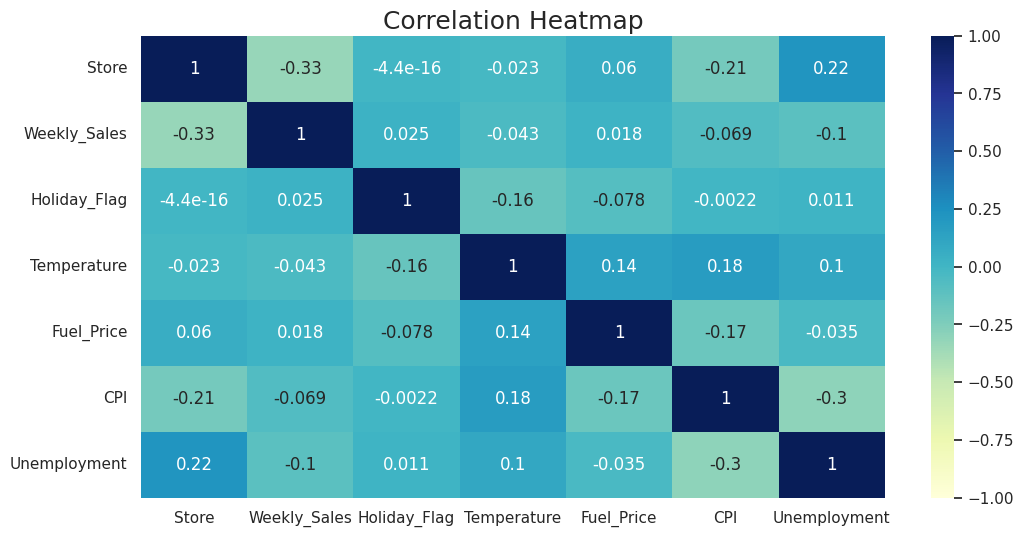

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap ="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=5);

In [20]:
#function to extract data from a dataframe given the name of the data_field name and corresponding value
def get_store_df(data, data_field, field_value):
    return (data[data[data_field] == field_value])

In [21]:
store_corr = pd.DataFrame(index = ['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'])

for i in range(1, 46):
    store_df = get_store_df(df, 'Store', i)
    store_corr['store_'+str(i)] = store_df.corr()['Weekly_Sales'].tolist()

In [22]:
store_corr.head()

store_1   store_2   store_3   store_4   store_5   store_6  \
Store              NaN       NaN       NaN       NaN       NaN       NaN   
Weekly_Sales  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
Holiday_Flag  0.194905  0.255012  0.208556 -0.156031  0.302525  0.181295   
Temperature  -0.222701 -0.139232 -0.377524  0.184882 -0.175517 -0.026491   
Fuel_Price    0.124592 -0.144209  0.140886  0.386253  0.167352 -0.062788   

               store_7   store_8   store_9  store_10  ...  store_36  store_37  \
Store              NaN       NaN       NaN       NaN  ...       NaN       NaN   
Weekly_Sales  1.000000  1.000000  1.000000  1.000000  ...  1.000000  1.000000   
Holiday_Flag  0.248766  0.172383  0.179264 -0.124917  ... -0.026605 -0.143336   
Temperature   0.015077 -0.312324 -0.208343 -0.167900  ... -0.094454 -0.300493   
Fuel_Price    0.110356  0.029752  0.205404 -0.083813  ... -0.727462  0.208218   

              store_38  store_39  store_40  store_41  store_42  store_43  \
Store              NaN       NaN       NaN       NaN       NaN       NaN   
Weekly_Sales  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
Holiday_Flag -0.027163  0.127115  0.101524  0.097854  0.061810  0.017768   
Temperature   0.032993  0.064738  0.090598  0.106761 -0.151639  0.095272   
Fuel_Price    0.697184  0.266659  0.029627  0.305745  0.323031 -0.342037   

              store_44  store_45  
Store              NaN       NaN  
Weekly_Sales  1.000000  1.000000  
Holiday_Flag -0.074599  0.106357  
Temperature   0.267822 -0.201945  
Fuel_Price    0.607367 -0.046663  

[5 rows x 45 columns]

In [23]:
stor_corr = store_corr.dropna()
store_corrT = store_corr.T
del store_corrT['Weekly_Sales']
store_corrT

Store  Holiday_Flag  Temperature  Fuel_Price       CPI  Unemployment
store_1     NaN      0.194905    -0.222701    0.124592  0.225408     -0.097955
store_2     NaN      0.255012    -0.139232   -0.144209 -0.043477      0.025963
store_3     NaN      0.208556    -0.377524    0.140886  0.317250     -0.230413
store_4     NaN     -0.156031     0.184882    0.386253  0.398682     -0.373037
store_5     NaN      0.302525    -0.175517    0.167352  0.308261     -0.207043
store_6     NaN      0.181295    -0.026491   -0.062788  0.055004     -0.000020
store_7     NaN      0.248766     0.015077    0.110356  0.289044     -0.165382
store_8     NaN      0.172383    -0.312324    0.029752  0.120255     -0.052580
store_9     NaN      0.179264    -0.208343    0.205404  0.294805     -0.191534
store_10    NaN     -0.124917    -0.167900   -0.083813 -0.045384      0.099528
store_11    NaN      0.152674    -0.278503   -0.041299  0.069781     -0.020339
store_12    NaN      0.255340    -0.379416    0.015072  0.084087     -0.009286
store_13    NaN     -0.201370     0.316177    0.293517  0.240520     -0.229574
store_14    NaN     -0.031785     0.060659   -0.269621 -0.339701      0.200388
store_15    NaN      0.189688    -0.050541   -0.190398 -0.174467      0.078905
store_16    NaN      0.152345     0.182948   -0.002426  0.124285     -0.070864
store_17    NaN      0.211512     0.081012    0.311631  0.348571     -0.263600
store_18    NaN      0.131950    -0.144278   -0.275051 -0.193541      0.139179
store_19    NaN      0.189520    -0.080805   -0.190684 -0.155341      0.101464
store_20    NaN     -0.133186     0.203055    0.127382  0.162826     -0.019677
store_21    NaN      0.150505    -0.177084   -0.136542 -0.163649      0.218367
store_22    NaN      0.096199    -0.082892   -0.074896 -0.038602      0.039043
store_23    NaN      0.103863     0.143760    0.055894  0.147979     -0.135408
store_24    NaN      0.194128     0.111833   -0.105005 -0.013684     -0.012261
store_25    NaN      0.080266    -0.031311   -0.084262 -0.010914     -0.004958
store_26    NaN      0.172268     0.211722    0.023475  0.131980     -0.066899
store_27    NaN      0.181904     0.300876   -0.210325 -0.202259      0.009678
store_28    NaN      0.234237    -0.376506   -0.142722 -0.095908      0.136671
store_29    NaN      0.187405    -0.129144   -0.092129 -0.072530      0.084682
store_30    NaN     -0.020753    -0.330816   -0.431441 -0.298188      0.201862
store_31    NaN      0.227655    -0.262192    0.109563  0.132887     -0.064738
store_32    NaN      0.074198    -0.111681    0.118010  0.196782     -0.099455
store_33    NaN      0.031160     0.019244   -0.059887 -0.052271      0.101175
store_34    NaN      0.197760    -0.278523    0.013688  0.115437      0.017010
store_35    NaN      0.201414     0.043392   -0.498197 -0.424107      0.483865
store_36    NaN     -0.026605    -0.094454   -0.727462 -0.915095      0.833734
store_37    NaN     -0.143336    -0.300493    0.208218  0.244507     -0.221287
store_38    NaN     -0.027163     0.032993    0.697184  0.812837     -0.785290
store_39    NaN      0.127115     0.064738    0.266659  0.428043     -0.384681
store_40    NaN      0.101524     0.090598    0.029627  0.113318     -0.112528
store_41    NaN      0.097854     0.106761    0.305745  0.392293     -0.350630
store_42    NaN      0.061810    -0.151639    0.323031  0.360859     -0.356355
store_43    NaN      0.017768     0.095272   -0.342037 -0.285686     -0.201954
store_44    NaN     -0.074599     0.267822    0.607367  0.740150     -0.780076
store_45    NaN      0.106357    -0.201945   -0.046663 -0.023548     -0.004041

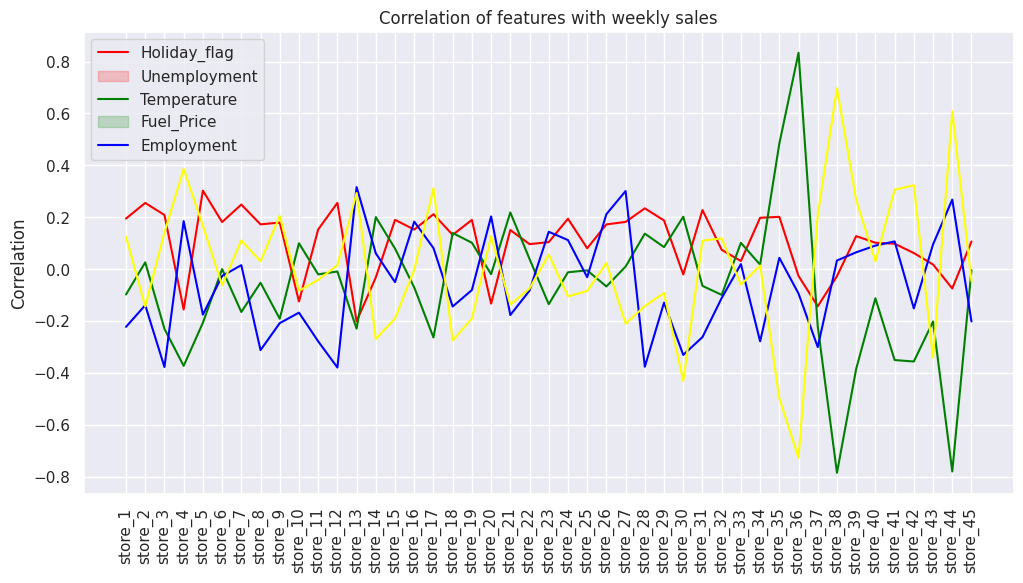

In [24]:
#Examine the correlationship of independent features with weekly_sales

fig, axes = plt.subplots(figsize = (12, 6))
plt.xticks(rotation = 90)
sns.lineplot(x = store_corrT.index, y = store_corrT.Holiday_Flag, color = 'red')
sns.lineplot(x = store_corrT.index, y = store_corrT.Unemployment, color = 'green')
sns.lineplot(x = store_corrT.index, y = store_corrT.Temperature, color = 'blue')
sns.lineplot(x = store_corrT.index, y = store_corrT.Fuel_Price, color = 'yellow')
#sns.lineplot(x = store_corrT.index, y = store_corrT.employment, color = 'black')
plt.legend(['Holiday_flag', 'Unemployment', 'Temperature', 'Fuel_Price', 'Employment'], loc = 'best')
plt.grid(True)
plt.ylabel('Correlation')
plt.title('Correlation of features with weekly sales')
plt.show()

In [25]:
#positive unemployment correlation
pos_u_corr = store_corrT[store_corrT['Unemployment']>0].sort_values(by ='Unemployment')

#negative unemployment correlation
neg_u_corr = store_corrT[store_corrT['Unemployment']<0].sort_values(by ='Unemployment')

In [26]:
print(f"\n There are {pos_u_corr['Unemployment'].shape[0]} stores whose sales will increase as unemployment increases")
pos_u_corr


 There are 16 stores whose sales will increase as unemployment increases


Store  Holiday_Flag  Temperature  Fuel_Price       CPI  Unemployment
store_27    NaN      0.181904     0.300876   -0.210325 -0.202259      0.009678
store_34    NaN      0.197760    -0.278523    0.013688  0.115437      0.017010
store_2     NaN      0.255012    -0.139232   -0.144209 -0.043477      0.025963
store_22    NaN      0.096199    -0.082892   -0.074896 -0.038602      0.039043
store_15    NaN      0.189688    -0.050541   -0.190398 -0.174467      0.078905
store_29    NaN      0.187405    -0.129144   -0.092129 -0.072530      0.084682
store_10    NaN     -0.124917    -0.167900   -0.083813 -0.045384      0.099528
store_33    NaN      0.031160     0.019244   -0.059887 -0.052271      0.101175
store_19    NaN      0.189520    -0.080805   -0.190684 -0.155341      0.101464
store_28    NaN      0.234237    -0.376506   -0.142722 -0.095908      0.136671
store_18    NaN      0.131950    -0.144278   -0.275051 -0.193541      0.139179
store_14    NaN     -0.031785     0.060659   -0.269621 -0.339701      0.200388
store_30    NaN     -0.020753    -0.330816   -0.431441 -0.298188      0.201862
store_21    NaN      0.150505    -0.177084   -0.136542 -0.163649      0.218367
store_35    NaN      0.201414     0.043392   -0.498197 -0.424107      0.483865
store_36    NaN     -0.026605    -0.094454   -0.727462 -0.915095      0.833734

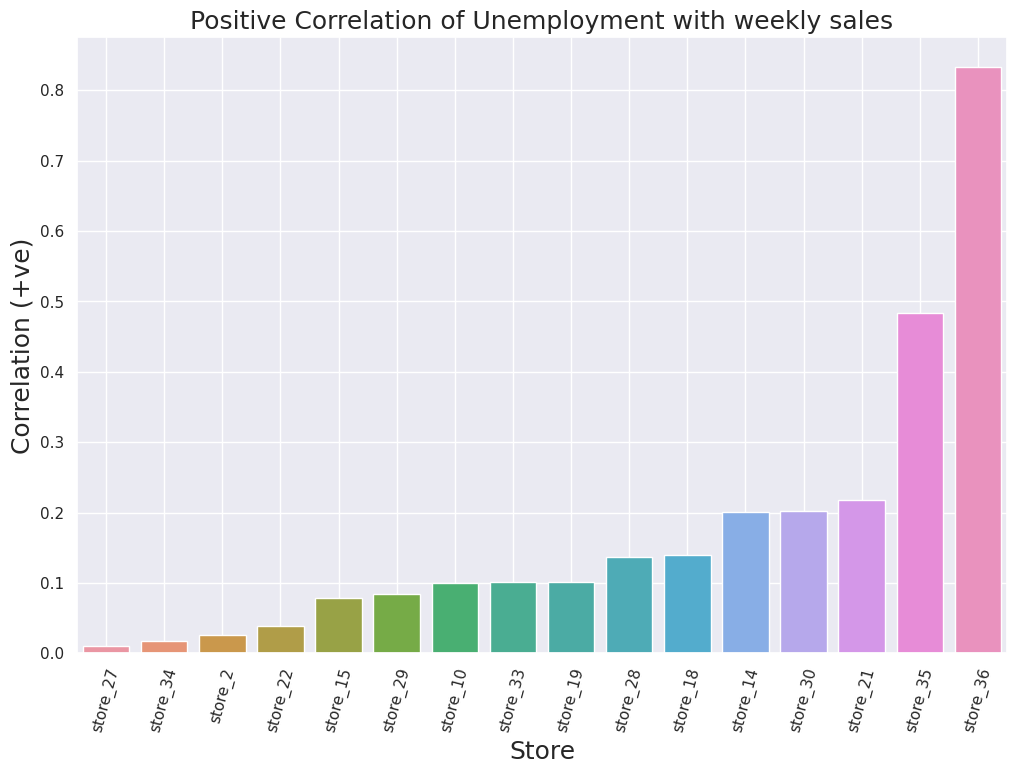

In [27]:
fig, axes = plt.subplots(figsize = (12, 8))
plt.xticks(rotation = 75)
sns.barplot(x = pos_u_corr.index, y= pos_u_corr.Unemployment)
plt.xlabel('Store', fontsize = 18)
plt.ylabel('Correlation (+ve)', fontsize = 18)
plt.title('Positive Correlation of Unemployment with weekly sales', fontsize = 18)
plt.grid(True)

In [28]:
print(f"\n There are {neg_u_corr['Unemployment'].shape[0]} stores whose sales will decreases as unemployment increases")
neg_u_corr


 There are 29 stores whose sales will decreases as unemployment increases


Store  Holiday_Flag  Temperature  Fuel_Price       CPI  Unemployment
store_38    NaN     -0.027163     0.032993    0.697184  0.812837     -0.785290
store_44    NaN     -0.074599     0.267822    0.607367  0.740150     -0.780076
store_39    NaN      0.127115     0.064738    0.266659  0.428043     -0.384681
store_4     NaN     -0.156031     0.184882    0.386253  0.398682     -0.373037
store_42    NaN      0.061810    -0.151639    0.323031  0.360859     -0.356355
store_41    NaN      0.097854     0.106761    0.305745  0.392293     -0.350630
store_17    NaN      0.211512     0.081012    0.311631  0.348571     -0.263600
store_3     NaN      0.208556    -0.377524    0.140886  0.317250     -0.230413
store_13    NaN     -0.201370     0.316177    0.293517  0.240520     -0.229574
store_37    NaN     -0.143336    -0.300493    0.208218  0.244507     -0.221287
store_5     NaN      0.302525    -0.175517    0.167352  0.308261     -0.207043
store_43    NaN      0.017768     0.095272   -0.342037 -0.285686     -0.201954
store_9     NaN      0.179264    -0.208343    0.205404  0.294805     -0.191534
store_7     NaN      0.248766     0.015077    0.110356  0.289044     -0.165382
store_23    NaN      0.103863     0.143760    0.055894  0.147979     -0.135408
store_40    NaN      0.101524     0.090598    0.029627  0.113318     -0.112528
store_32    NaN      0.074198    -0.111681    0.118010  0.196782     -0.099455
store_1     NaN      0.194905    -0.222701    0.124592  0.225408     -0.097955
store_16    NaN      0.152345     0.182948   -0.002426  0.124285     -0.070864
store_26    NaN      0.172268     0.211722    0.023475  0.131980     -0.066899
store_31    NaN      0.227655    -0.262192    0.109563  0.132887     -0.064738
store_8     NaN      0.172383    -0.312324    0.029752  0.120255     -0.052580
store_11    NaN      0.152674    -0.278503   -0.041299  0.069781     -0.020339
store_20    NaN     -0.133186     0.203055    0.127382  0.162826     -0.019677
store_24    NaN      0.194128     0.111833   -0.105005 -0.013684     -0.012261
store_12    NaN      0.255340    -0.379416    0.015072  0.084087     -0.009286
store_25    NaN      0.080266    -0.031311   -0.084262 -0.010914     -0.004958
store_45    NaN      0.106357    -0.201945   -0.046663 -0.023548     -0.004041
store_6     NaN      0.181295    -0.026491   -0.062788  0.055004     -0.000020

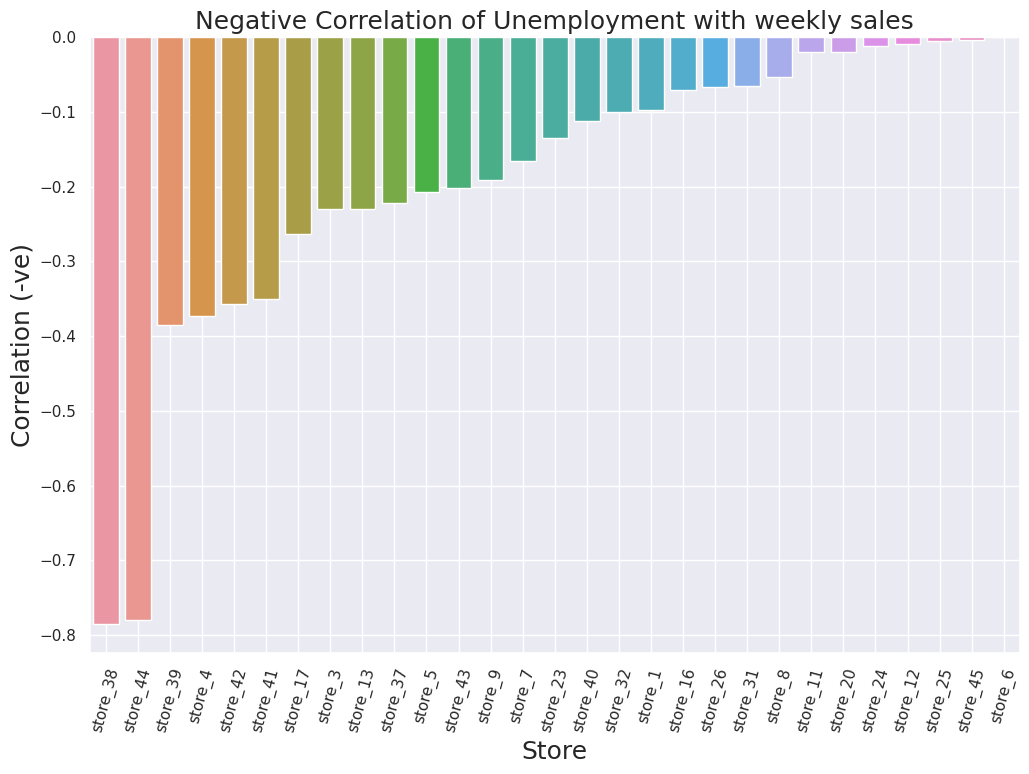

In [29]:
fig, axes = plt.subplots(figsize = (12, 8))
plt.xticks(rotation = 75)
sns.barplot(x = neg_u_corr.index, y=neg_u_corr.Unemployment)
plt.xlabel('Store', fontsize = 18)
plt.ylabel('Correlation (-ve)', fontsize = 18)
plt.title('Negative Correlation of Unemployment with weekly sales', fontsize = 18)
plt.grid(True)

In [30]:
unemp_1 = pd.DataFrame(zip(pos_u_corr.index, pos_u_corr.Unemployment), columns = ['store(pos)', 'corr(pos)'])
unemp_2 = pd.DataFrame(zip(neg_u_corr.index, neg_u_corr.Unemployment), columns = ['store(neg)', 'corr(neg)'])
Unemployment = pd.concat([unemp_2, unemp_1], axis=1, join = 'outer', ignore_index = True)
Unemployment.columns = ['store(neg)', 'corr(neg)', 'store(pos)', 'corr(pos)']
Unemployment

store(neg)  corr(neg) store(pos)  corr(pos)
0    store_38  -0.785290   store_27   0.009678
1    store_44  -0.780076   store_34   0.017010
2    store_39  -0.384681    store_2   0.025963
3     store_4  -0.373037   store_22   0.039043
4    store_42  -0.356355   store_15   0.078905
5    store_41  -0.350630   store_29   0.084682
6    store_17  -0.263600   store_10   0.099528
7     store_3  -0.230413   store_33   0.101175
8    store_13  -0.229574   store_19   0.101464
9    store_37  -0.221287   store_28   0.136671
10    store_5  -0.207043   store_18   0.139179
11   store_43  -0.201954   store_14   0.200388
12    store_9  -0.191534   store_30   0.201862
13    store_7  -0.165382   store_21   0.218367
14   store_23  -0.135408   store_35   0.483865
15   store_40  -0.112528   store_36   0.833734
16   store_32  -0.099455        NaN        NaN
17    store_1  -0.097955        NaN        NaN
18   store_16  -0.070864        NaN        NaN
19   store_26  -0.066899        NaN        NaN
20   store_31  -0.064738        NaN        NaN
21    store_8  -0.052580        NaN        NaN
22   store_11  -0.020339        NaN        NaN
23   store_20  -0.019677        NaN        NaN
24   store_24  -0.012261        NaN        NaN
25   store_12  -0.009286        NaN        NaN
26   store_25  -0.004958        NaN        NaN
27   store_45  -0.004041        NaN        NaN
28    store_6  -0.000020        NaN        NaN

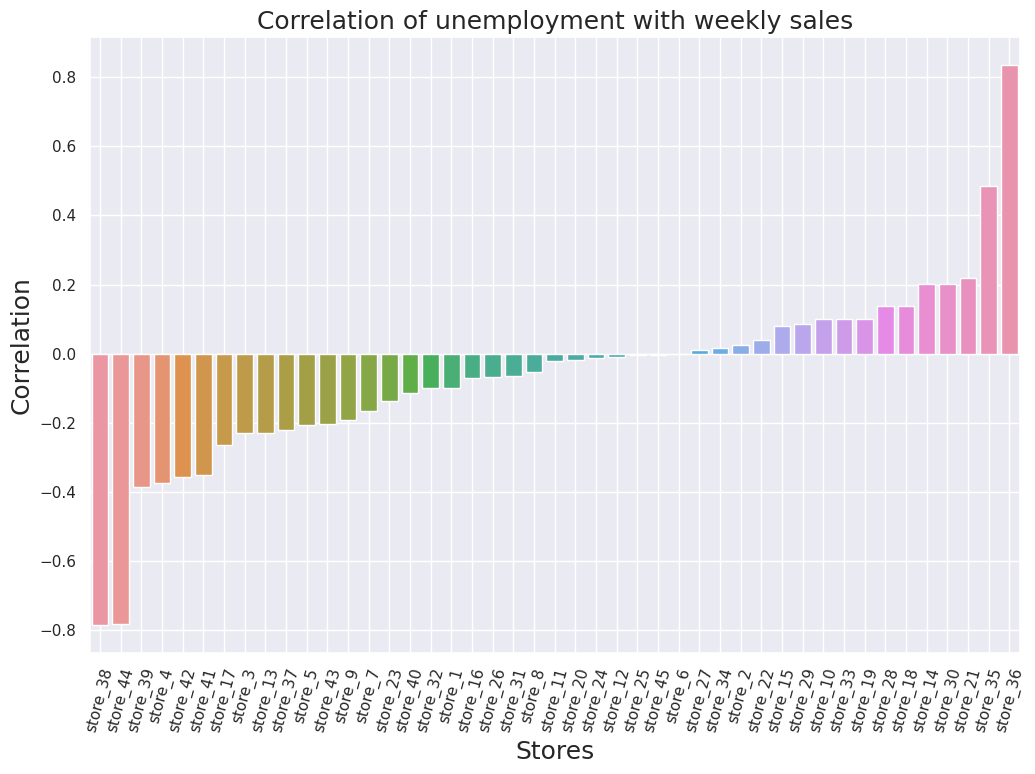

In [31]:
store_corrTT = store_corrT.sort_values(by = 'Unemployment')
fig,axes = plt.subplots(figsize=(12, 8))
plt.xticks(rotation = 75)
sns.barplot(x=store_corrTT.index, y = store_corrTT.Unemployment)
plt.xlabel('Stores', fontsize = 18)
plt.ylabel('Correlation', fontsize = 18)
plt.title('Correlation of unemployment with weekly sales', fontsize = 18)
plt.grid(True)
plt.show()

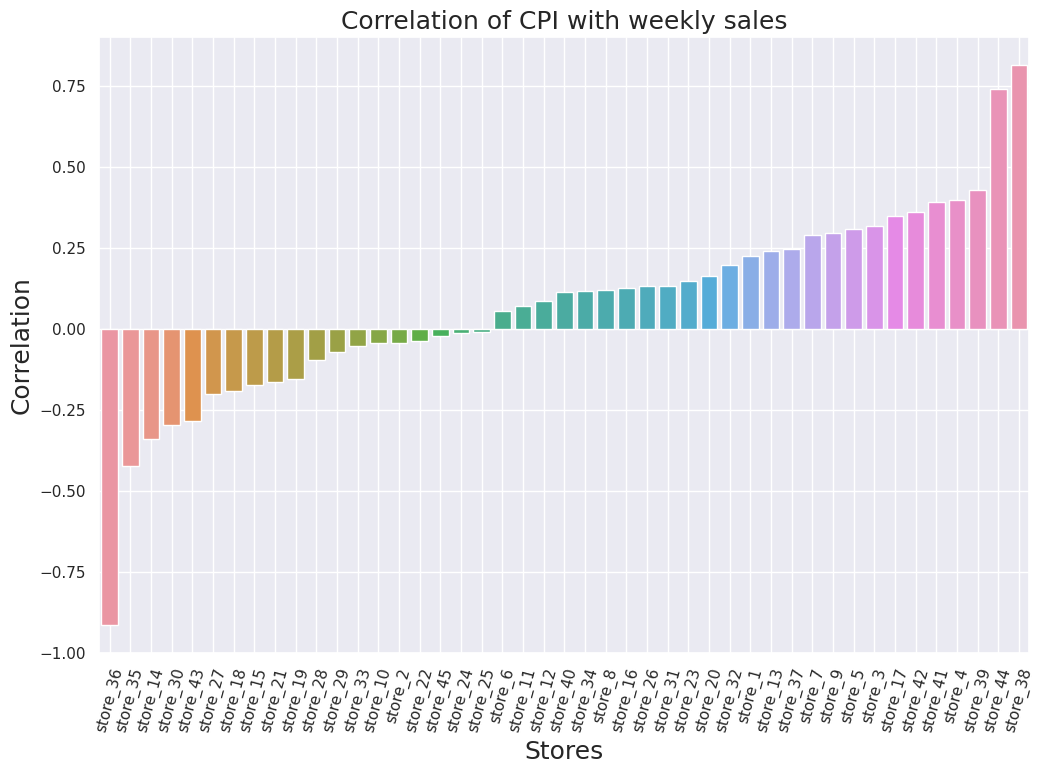

In [32]:
store_corrTT = store_corrT.sort_values(by = 'CPI')
fig,axes = plt.subplots(figsize=(12, 8))
plt.xticks(rotation = 75)
sns.barplot(x=store_corrTT.index, y = store_corrTT.CPI)
plt.xlabel('Stores', fontsize = 18)
plt.ylabel('Correlation', fontsize = 18)
plt.title('Correlation of CPI with weekly sales', fontsize = 18)
plt.grid(True)
plt.show()

In [33]:
store_corrTT.columns

Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment'],
      dtype='object')

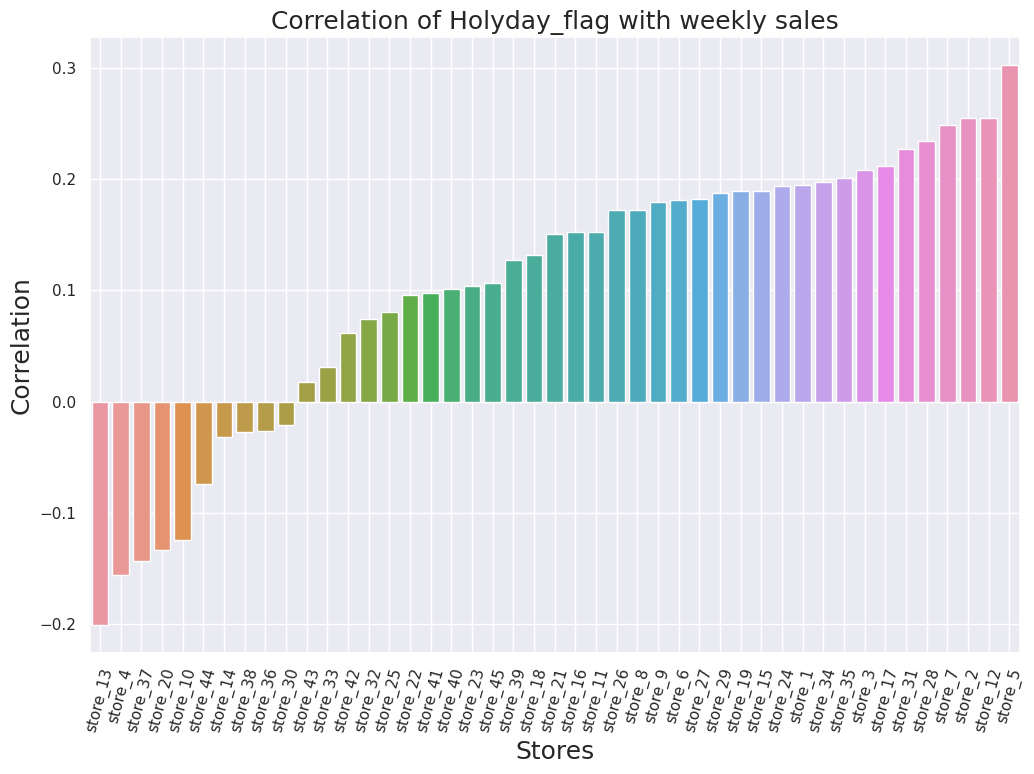

In [34]:
store_corrTT = store_corrT.sort_values(by = 'Holiday_Flag')
fig,axes = plt.subplots(figsize=(12, 8))
plt.xticks(rotation = 75)
sns.barplot(x=store_corrTT.index, y = store_corrTT.Holiday_Flag)
plt.xlabel('Stores', fontsize = 18)
plt.ylabel('Correlation', fontsize = 18)
plt.title('Correlation of Holyday_flag with weekly sales', fontsize = 18)
plt.grid(True)
plt.show()

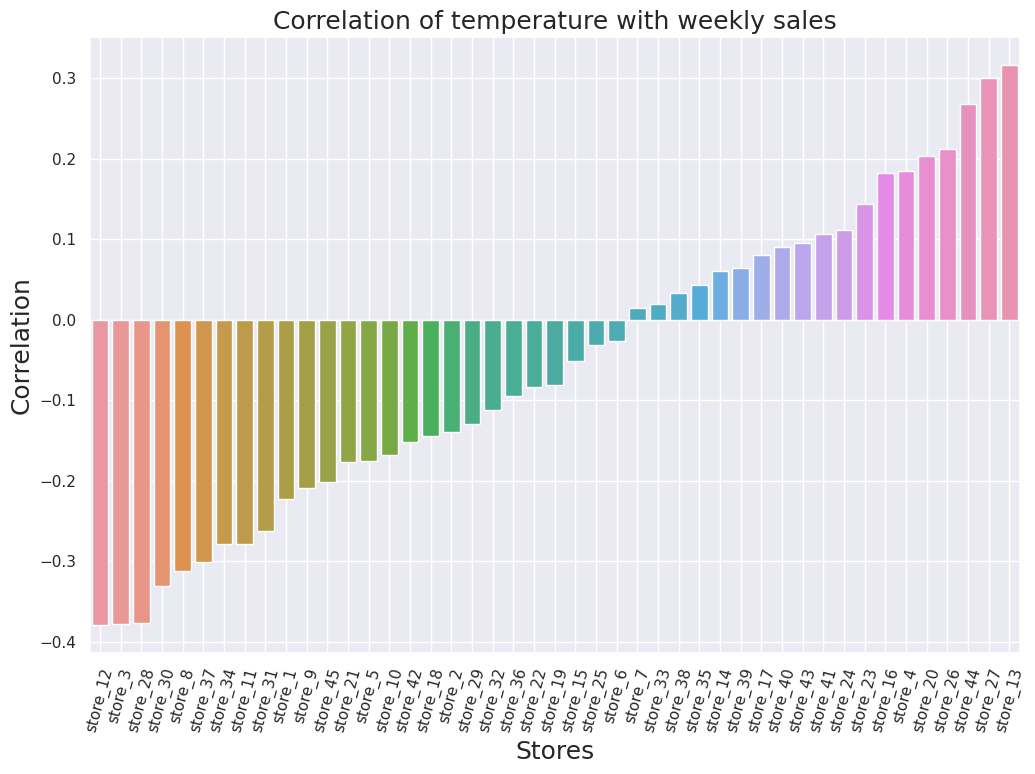

In [35]:
store_corrTT = store_corrT.sort_values(by = 'Temperature')
fig,axes = plt.subplots(figsize=(12, 8))
plt.xticks(rotation = 75)
sns.barplot(x=store_corrTT.index, y = store_corrTT.Temperature)
plt.xlabel('Stores', fontsize = 18)
plt.ylabel('Correlation', fontsize = 18)
plt.title('Correlation of temperature with weekly sales', fontsize = 18)
plt.grid(True)
plt.show()

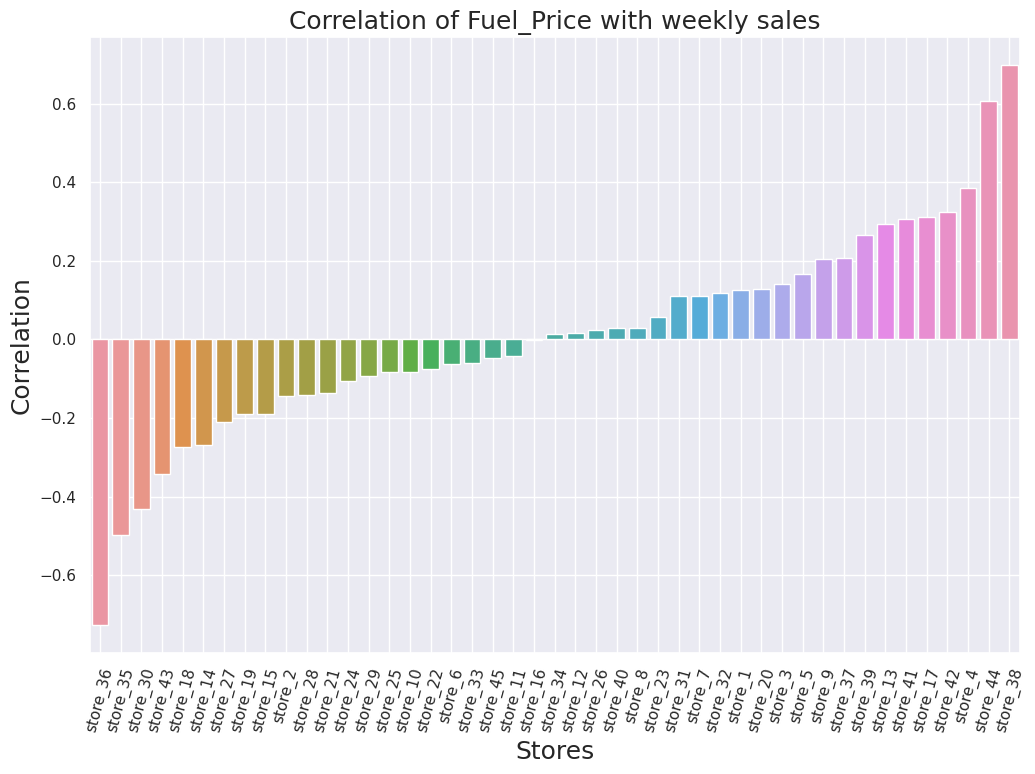

In [36]:
store_corrTT = store_corrT.sort_values(by = 'Fuel_Price')
fig,axes = plt.subplots(figsize=(12, 8))
plt.xticks(rotation = 75)
sns.barplot(x=store_corrTT.index, y = store_corrTT.Fuel_Price)
plt.xlabel('Stores', fontsize = 18)
plt.ylabel('Correlation', fontsize = 18)
plt.title('Correlation of Fuel_Price with weekly sales', fontsize = 18)
plt.grid(True)
plt.show()

In [37]:
# Explore correlation of other features with weekly_sales
df.corr()['Weekly_Sales']

Store          -0.331487
Weekly_Sales    1.000000
Holiday_Flag    0.024556
Temperature    -0.043344
Fuel_Price      0.018476
CPI            -0.069211
Unemployment   -0.103941
Name: Weekly_Sales, dtype: float64

**Correlation shows that fuel_price has the least effect on weekly_sales and unemployment has the strongest correlation with negative correlation which implies that as unemployment goes up, the weekly_sales desrese.**

In [38]:
Highest_Weekly_Sales = df.groupby(['Store'])['Weekly_Sales'].sum().reset_index().sort_values('Weekly_Sales', ascending=False)
store_list = Highest_Weekly_Sales['Store'].tolist()
highest_10 = Highest_Weekly_Sales['Store'].head(10).tolist()

print(Highest_Weekly_Sales.head(10),f'\n\n The Ten stores with the highest weekly sales{highest_10}')

    Store  Weekly_Sales
3       4  2.867997e+08
19     20  2.867490e+08
13     14  2.799706e+08
12     13  2.739669e+08
1       2  2.706436e+08
9      10  2.604826e+08
26     27  2.499602e+08
0       1  2.224028e+08
5       6  2.219893e+08
38     39  2.074455e+08 

 The Ten stores with the highest weekly sales[4, 20, 14, 13, 2, 10, 27, 1, 6, 39]


Text(0, 0.5, 'Weekly Sales')

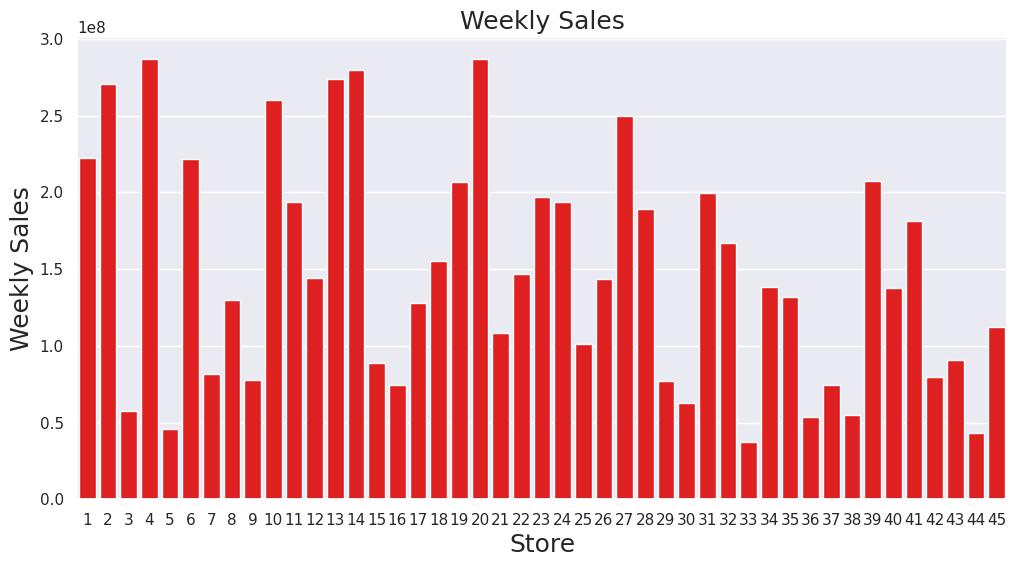

In [39]:
fig, axes = plt.subplots(figsize = (12, 6))
sns.barplot(x='Store', y='Weekly_Sales', data = Highest_Weekly_Sales, color='red')
plt.xticks(rotation = 0)
plt.title('Weekly Sales', fontsize = 18)
plt.xlabel('Store', fontsize = 18)
plt.ylabel('Weekly Sales', fontsize = 18)

**Show Average Weekly Sales of all the Stores**

In [40]:
avg_wkly_sales = df.groupby(['Store'])['Weekly_Sales'].mean().reset_index().sort_values('Weekly_Sales', ascending = False)
avg_wkly_sales.head(10)

Store  Weekly_Sales
3       4  2.005592e+06
19     20  2.005237e+06
13     14  1.957836e+06
12     13  1.915853e+06
1       2  1.892612e+06
9      10  1.821557e+06
26     27  1.747974e+06
0       1  1.555264e+06
5       6  1.552373e+06
38     39  1.450668e+06

Text(0, 0.5, 'Weekly Sales')

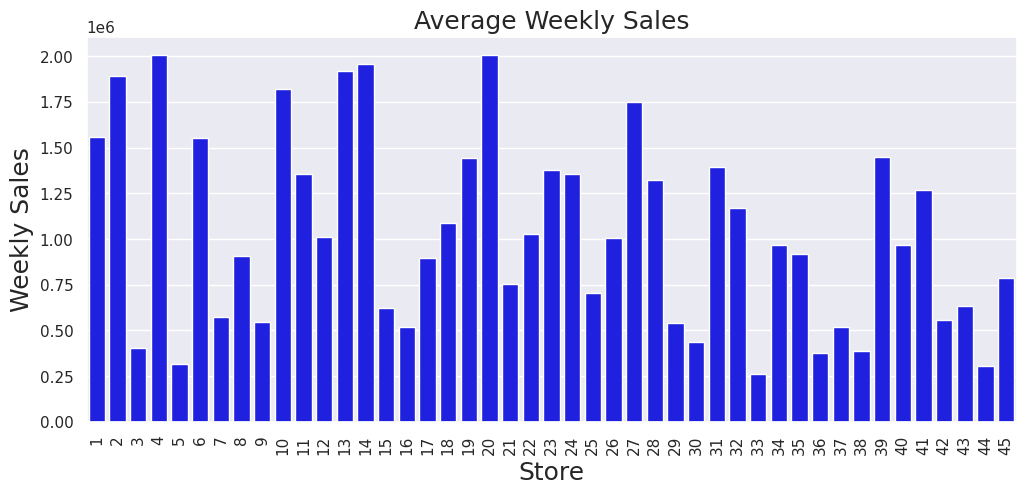

In [41]:
fig, axes = plt.subplots(figsize = (12, 5))
sns.barplot(x='Store', y='Weekly_Sales', data = avg_wkly_sales, color='blue')
plt.xticks(rotation = 90)
plt.title('Average Weekly Sales', fontsize = 18)
plt.xlabel('Store', fontsize = 18)
plt.ylabel('Weekly Sales', fontsize = 18)

**Number of sales records reported by each store**

In [42]:
store_count = df['Store'].value_counts().unique()
print(f'Each store reported {store_count[0]} weekly sales')

Each store reported 143 weekly sales


**Investigate the effect of weather on weakly sales of the stores**

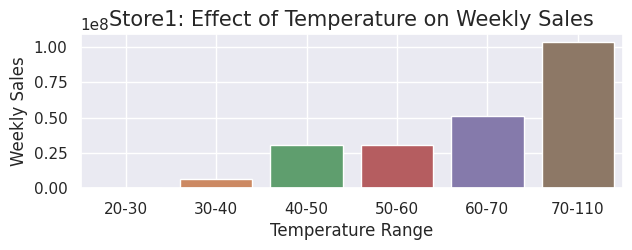

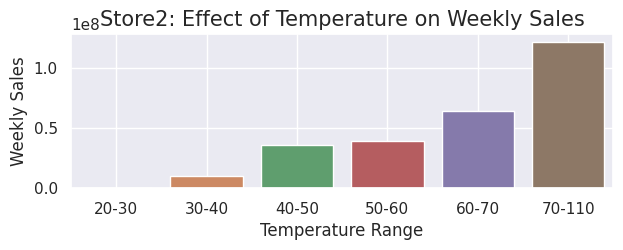

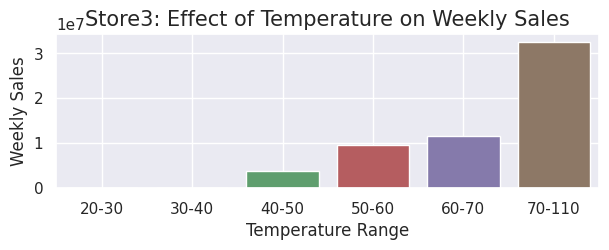

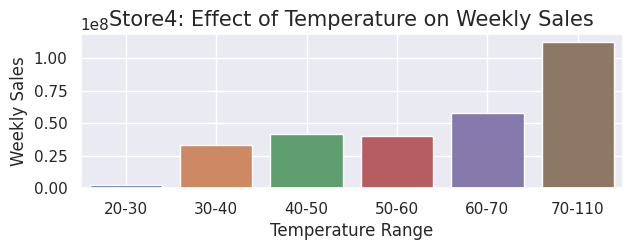

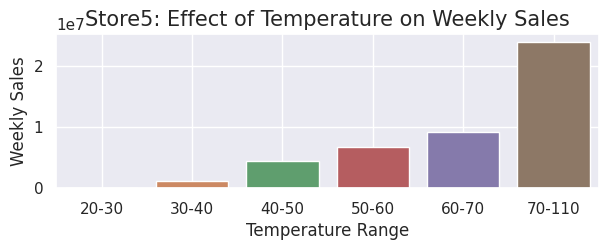

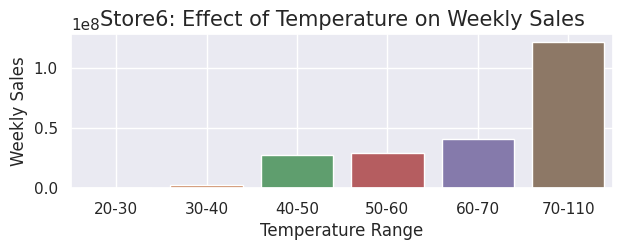

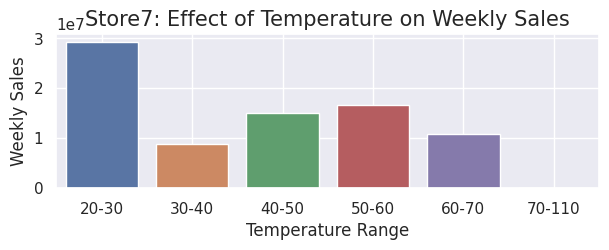

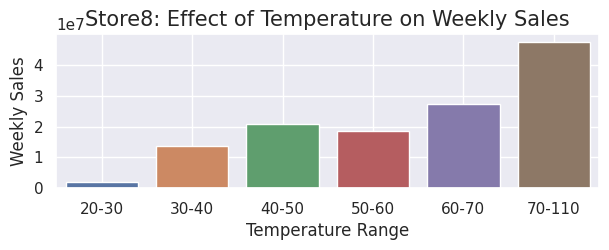

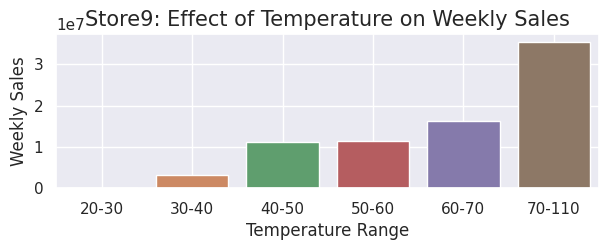

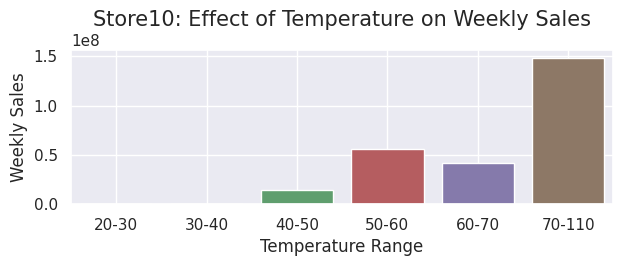

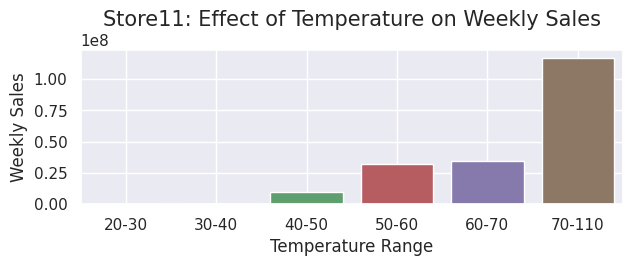

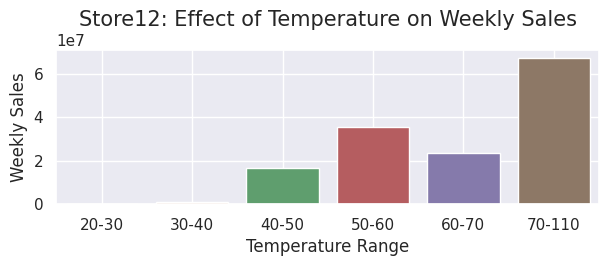

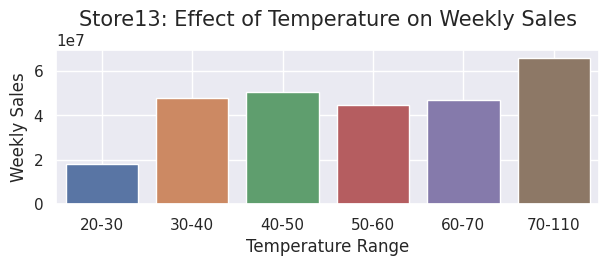

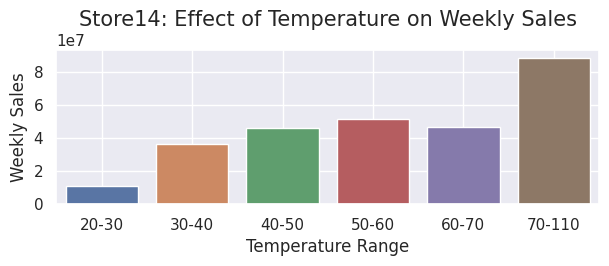

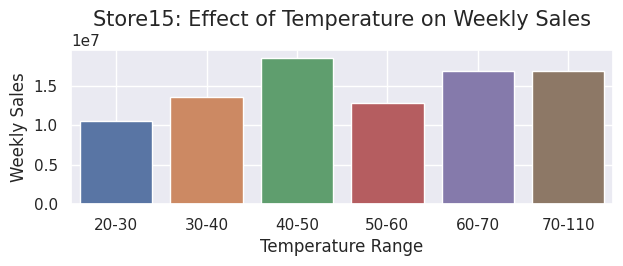

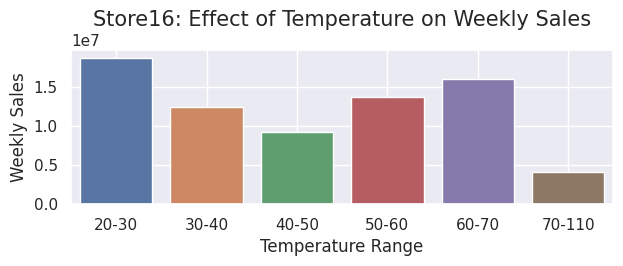

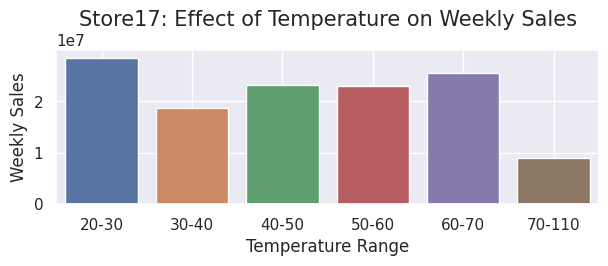

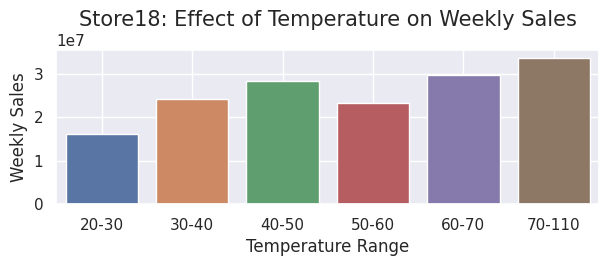

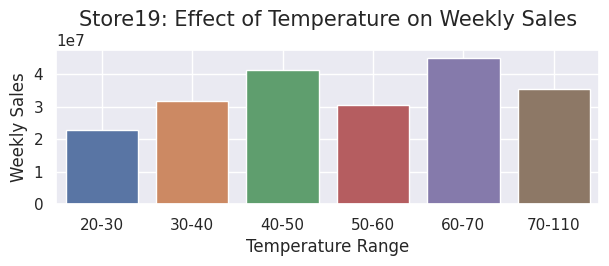

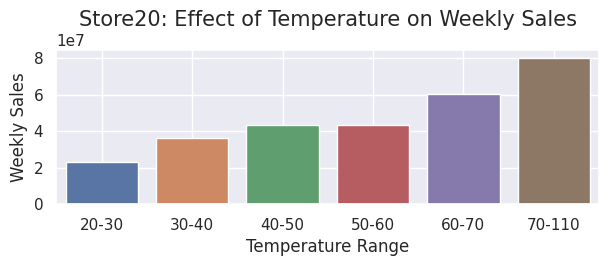

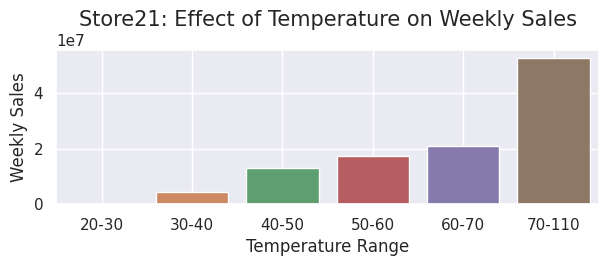

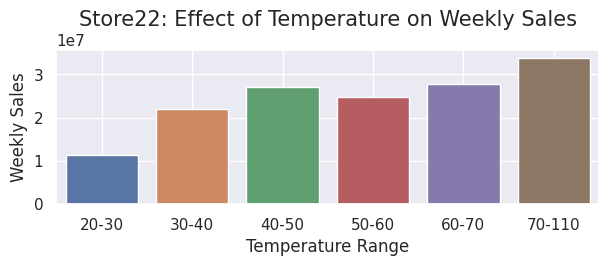

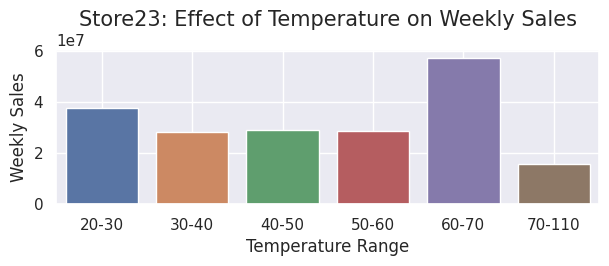

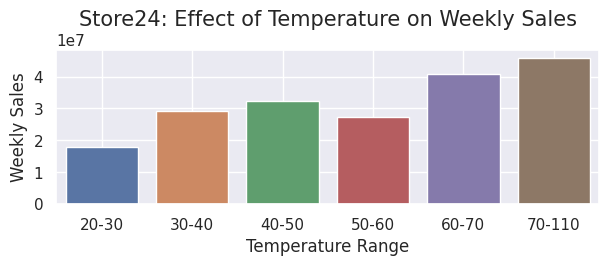

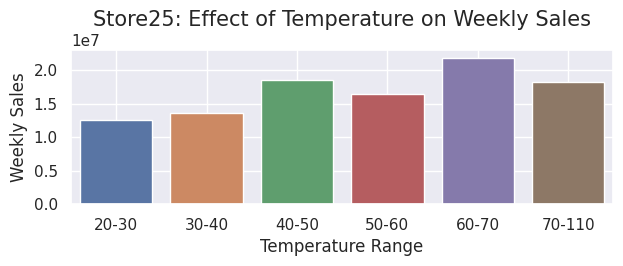

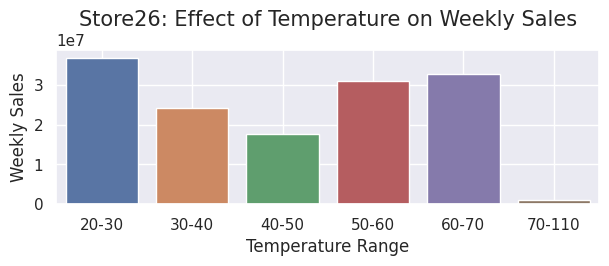

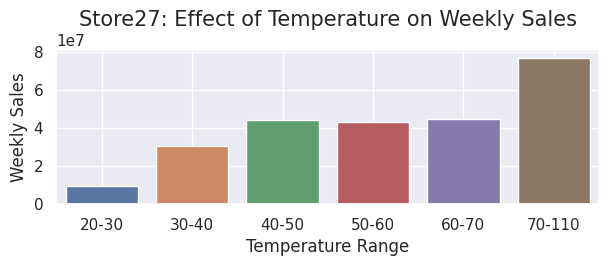

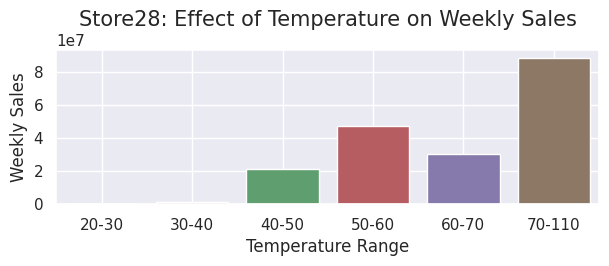

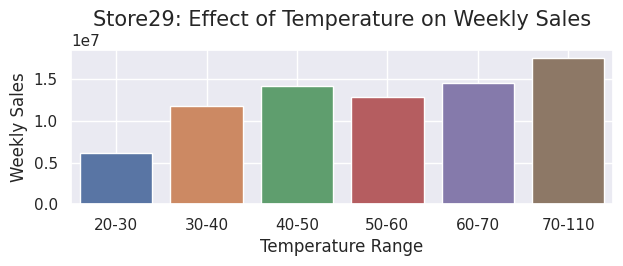

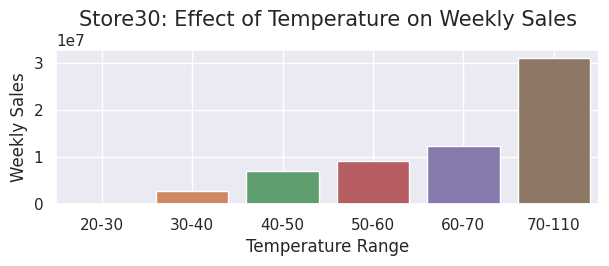

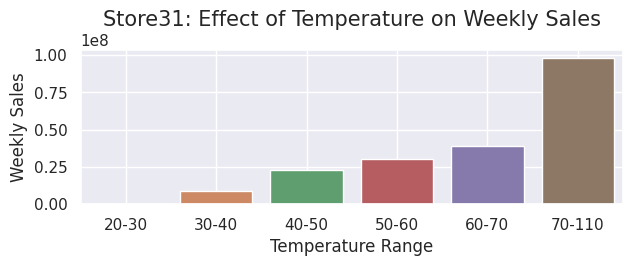

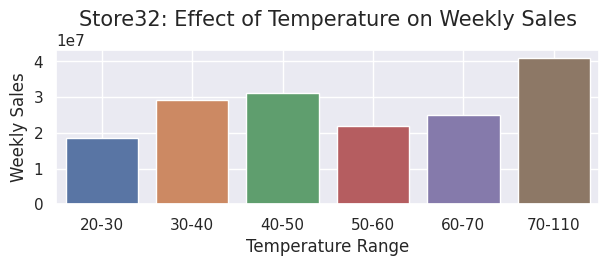

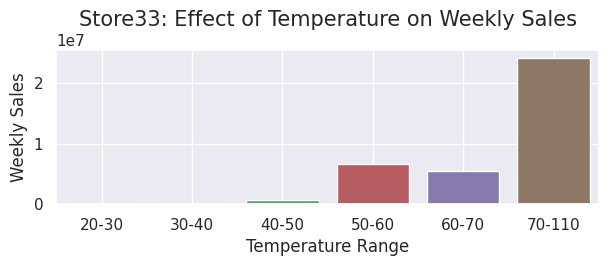

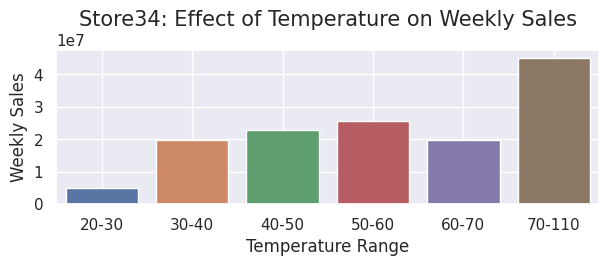

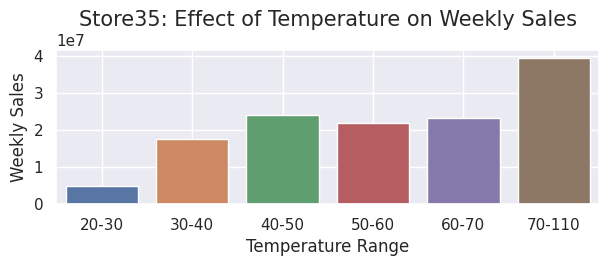

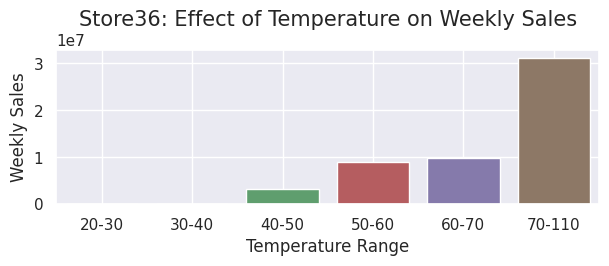

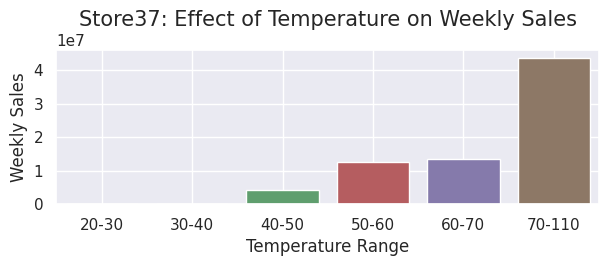

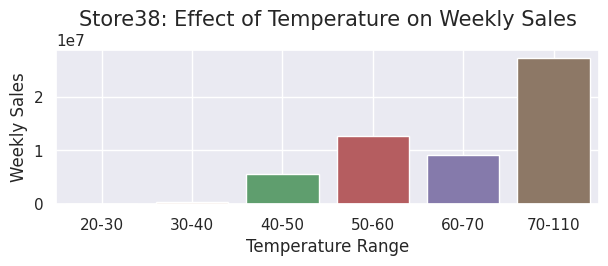

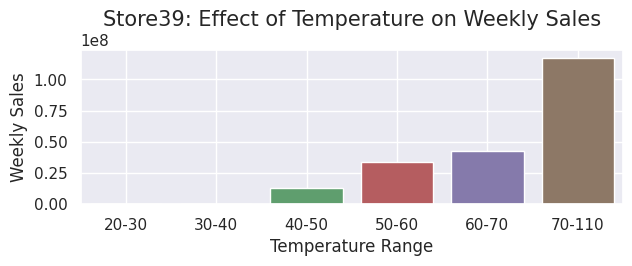

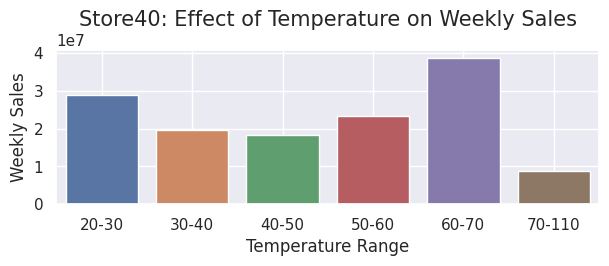

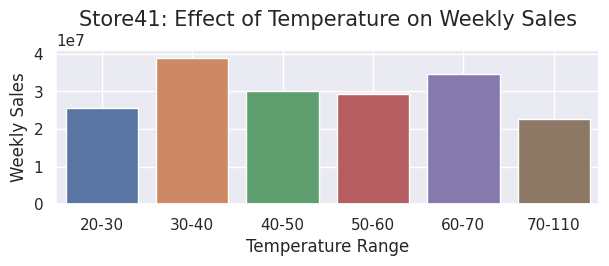

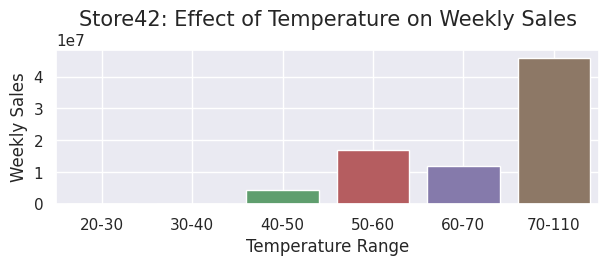

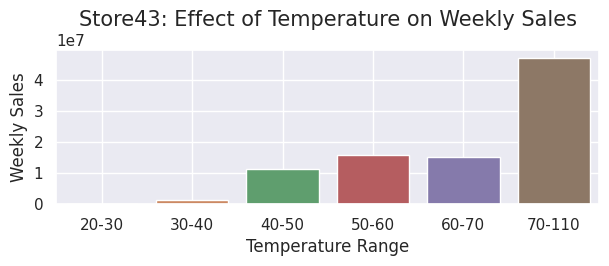

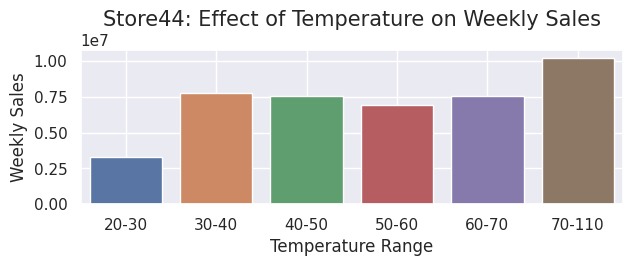

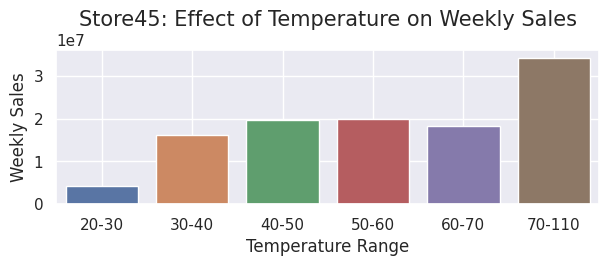

In [43]:
store_list = df['Store'].unique()

for i in store_list:
    x_store = get_store_df(df, 'Store', i)
    x_store = x_store[['Store', 'Temperature', 'Weekly_Sales']].sort_values('Temperature')
    x_store['Temperature'] = pd.cut(x_store['Temperature'], bins = [0, 30, 40, 50, 60, 70, 110], labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-110'])
    x_store = x_store.groupby('Temperature')['Weekly_Sales'].sum().reset_index()

    fig, axes = plt.subplots(figsize = (7, 2))
    sns.barplot(x= x_store.Temperature, y=x_store.Weekly_Sales)
    #plt.xticks(rotation = 90)
    plt.title(f'Store{i}: Effect of Temperature on Weekly Sales', fontsize = 15)
    plt.xlabel('Temperature Range', fontsize = 12)
    plt.ylabel('Weekly Sales', fontsize = 12)
    plt.grid(True)
    plt.show()

**What is the distribution of the features of the dataset?**

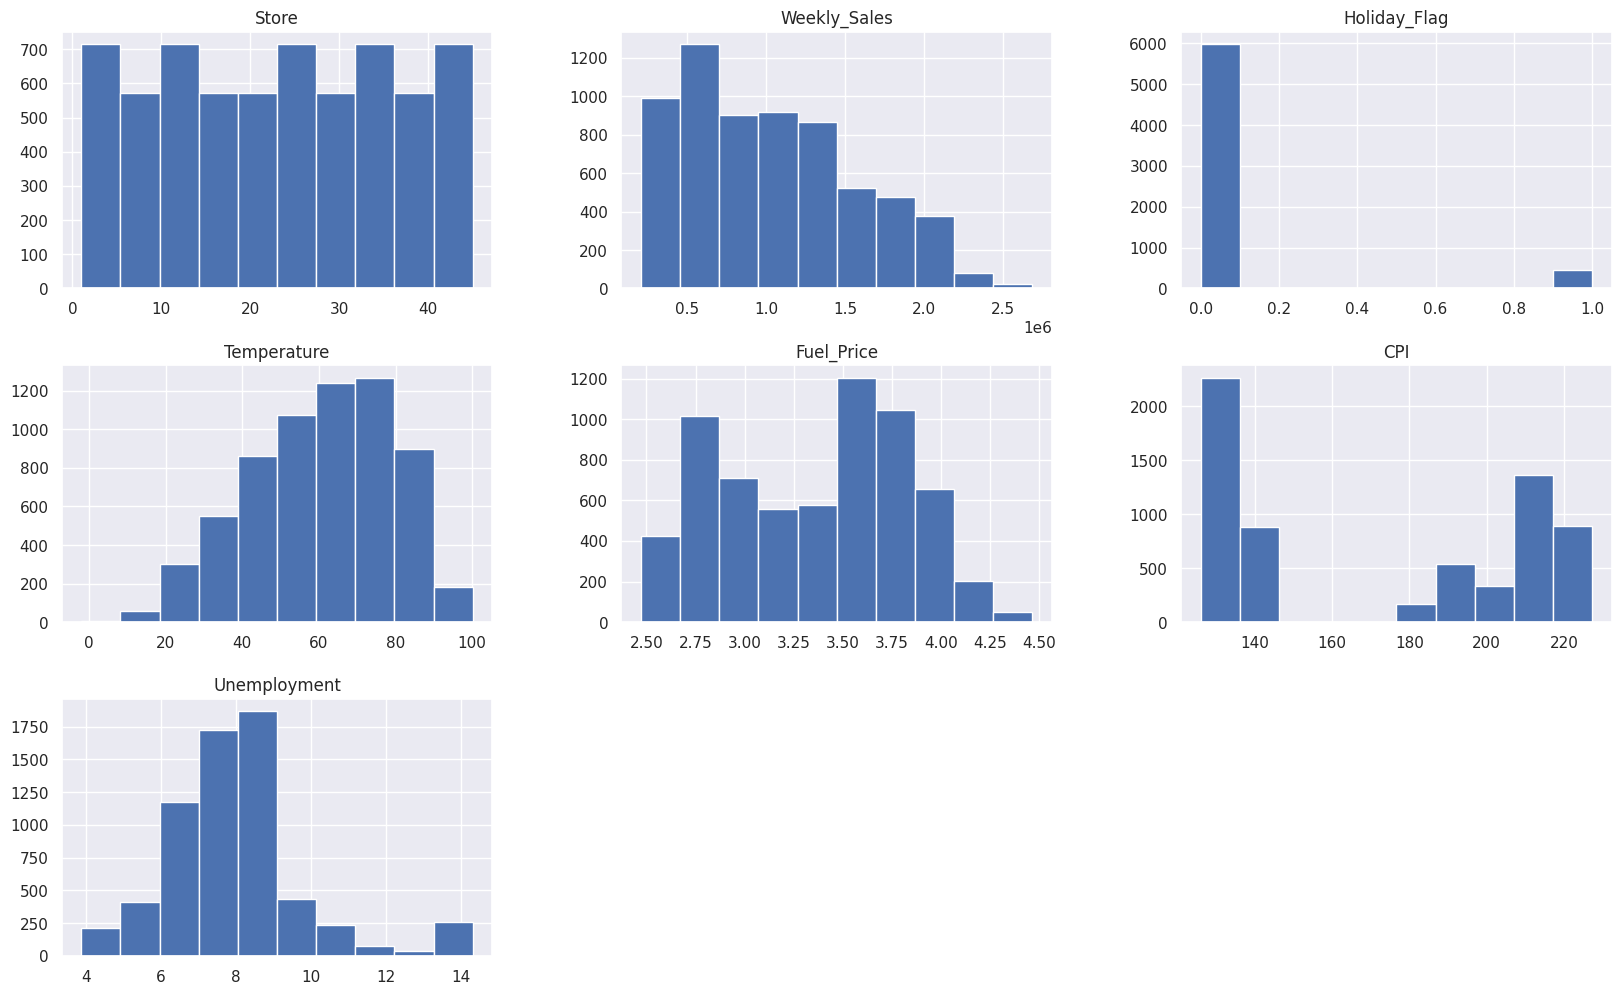

In [44]:
# histograms
df.hist(figsize=(20,12));

From the above histograms, we can understand that:
- the number of transactions occurred almost evenly across various stores and years.
- The distribution of `weekly_sales` right-skewed. Only a few of the weekly sales are above 2 million USD.
- The distribution of `temperature` is approximately normal.
- The distribution of `fuel_price` is bi-modal.
- `CPI` formed two clusters.
- `unemployment` rate is near normally distributed.
- Four consecutive months November-February recorded the highest sales.

In [45]:
def outliers_plot(xrange, l = 5, w = 2, wl = 20, ww = 10, hs = 1.5):
    fig, axes = plt.subplots(l, w, figsize = (wl, ww))
    plt.subplots_adjust(hspace = hs)
    j = 1

    for i in xrange:
        store_df = get_store_df(df, 'Store', i)
        plt.subplot(l, w, j)
        sns.boxplot(x=store_df['Weekly_Sales'])
        plt.title(f'Store: {i}', fontsize = 15)
        j = j+1

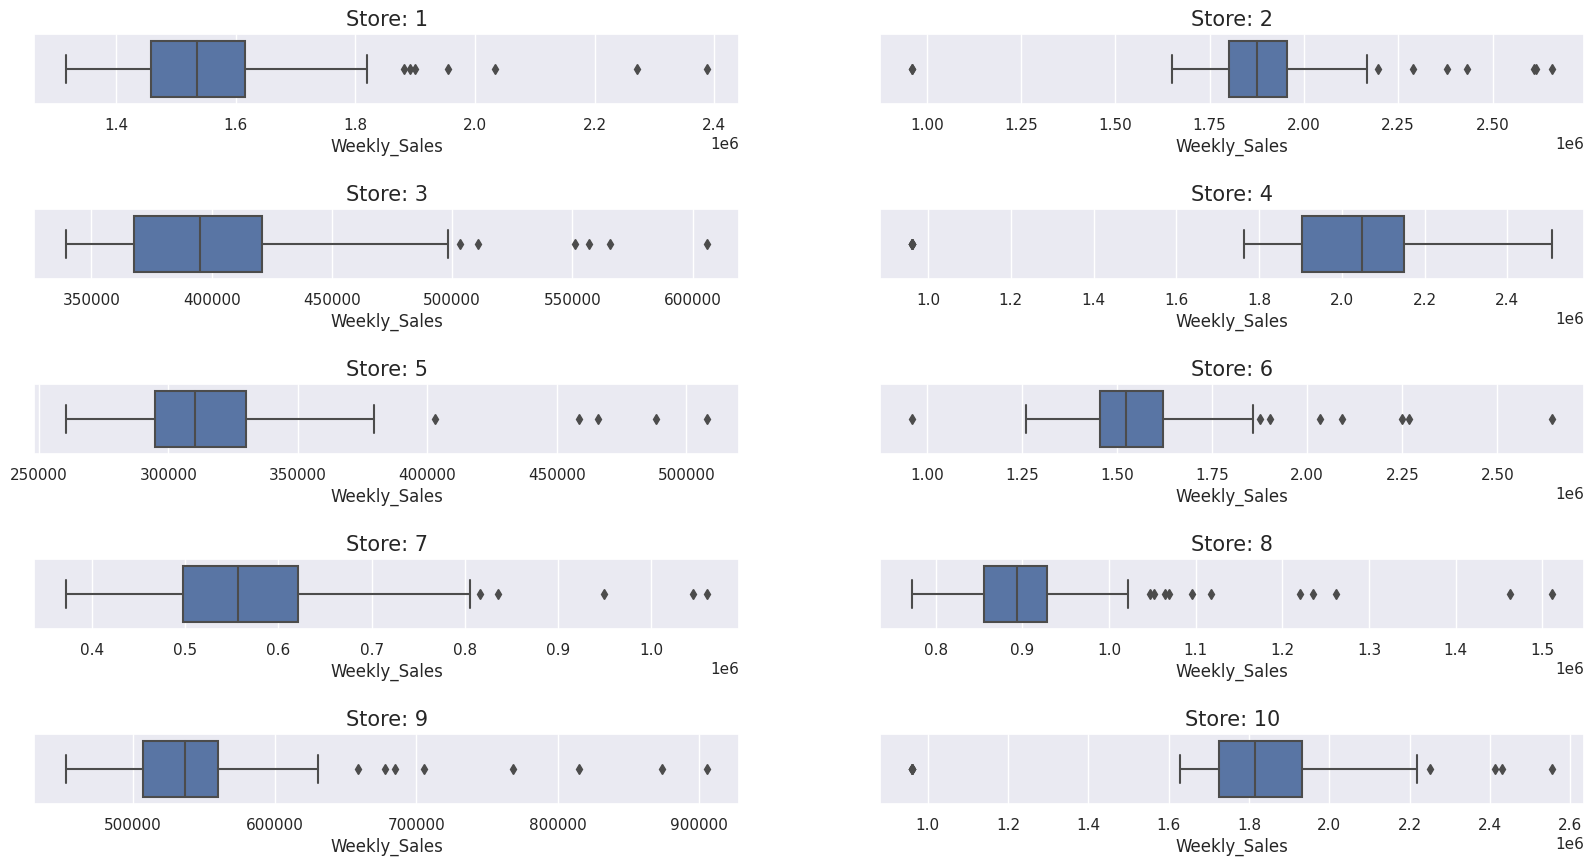

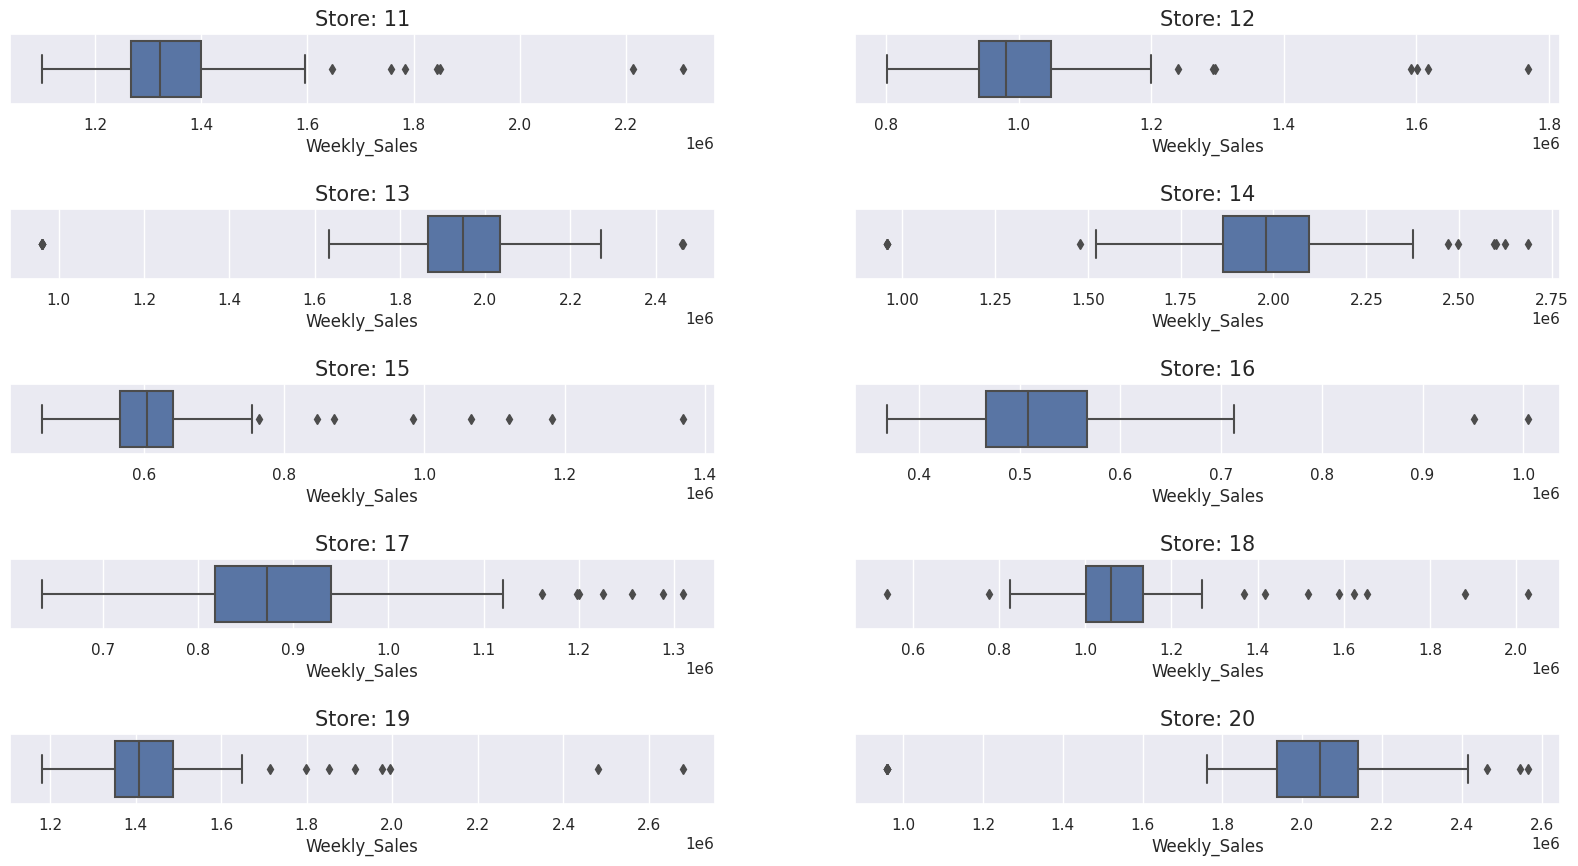

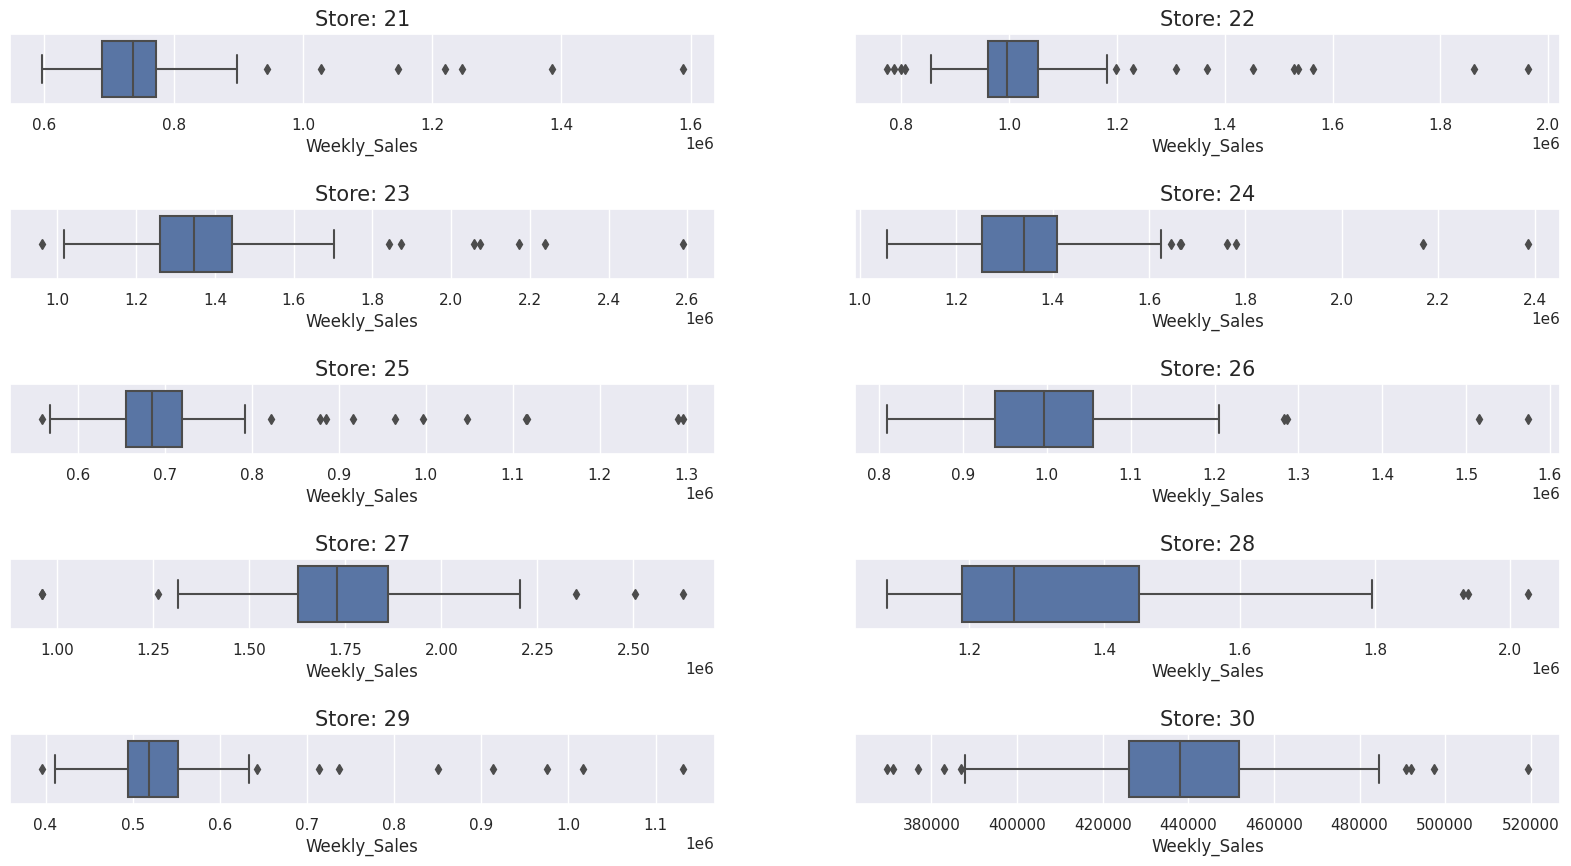

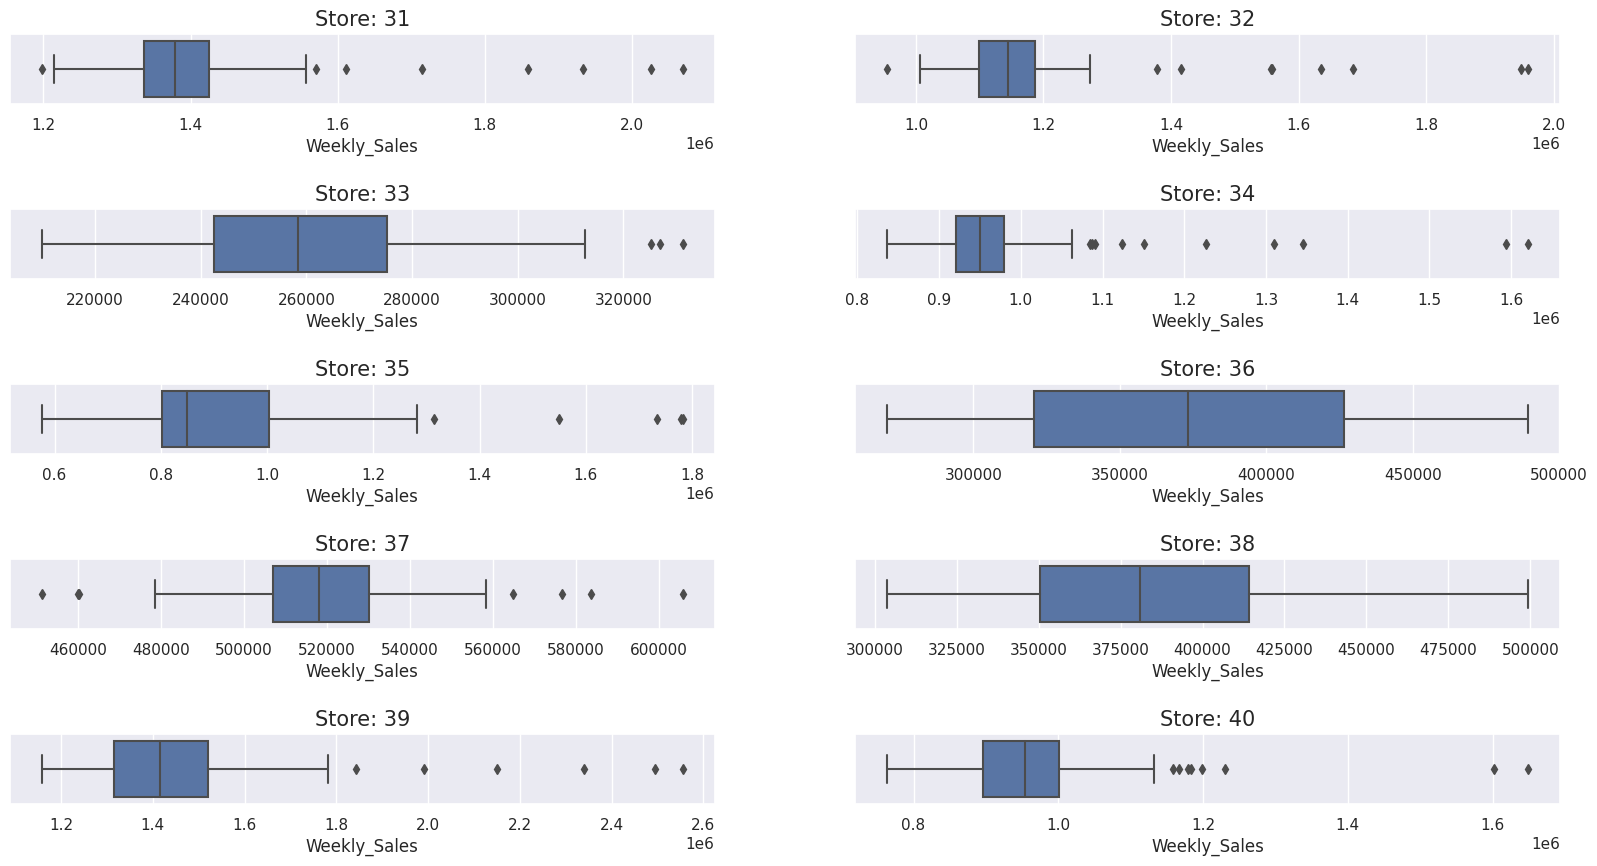

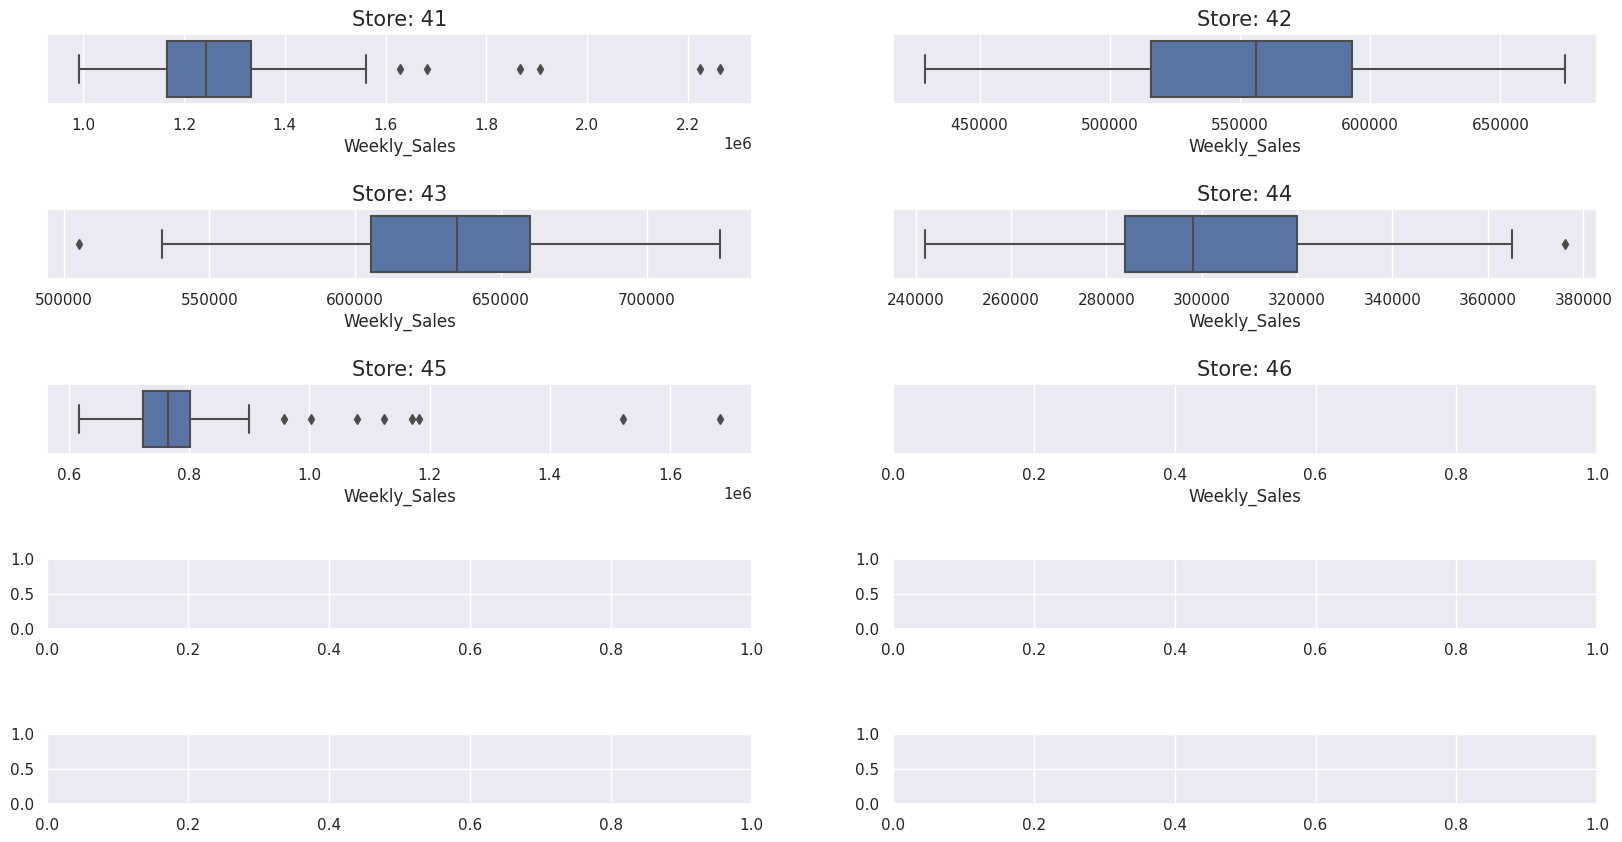

In [46]:
outliers_plot(range(1, 11))
outliers_plot(range(11, 21))
outliers_plot(range(21, 31))
outliers_plot(range(31, 41))
outliers_plot(range(41, 47))

**Which stores had the highest and lowest average revenues over the years?**

Identifying the top performing and lo performing stores or products in sales analysis can be useful for a variety of purposes. By analysing the sales data for different stores, businesses can identify opportunities for growth, understand customer preferences, optimise inventory levels, and identify potential problems or areas for improvement. Understanding the performance of different stores  can inform product development and marketing efforts, as well as help businesses allocate resources more effectively and make more informed business decisions.

We will create a function that takes a dataframe as input and generates two plots showing the top and bottom performing stores in terms of average sales.



In [47]:
def plot_top_and_bottom_stores(df, col):
    """
    Plot the top and bottom 5 stores based on their average weekly sales.

    Parameters:
    df (pandas DataFrame): The dataframe containing the sales data.
    col (str): The name of the column to group the data by.

    Returns:
    None
    """
    # Group the data by the specified column and sort it by sales in descending order
    df = df.groupby(col).mean().sort_values(by='Weekly_Sales', ascending=False)

    # Select the top 5 and bottom 5 products
    top_stores = df.head(5)
    bottom_stores = df.tail(5)

    # Set the color palette
    sns.set_palette("bright")

    # Create a bar chart of the top 5 products
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.barplot(x=top_stores.index, y=top_stores['Weekly_Sales']/1e6, order=top_stores.index)
    plt.title('Top 5 Stores by Average Sales')
    plt.ylabel('Average weekly sales (millions USD)')
    plt.show()

    # Create a bar chart of the bottom 5 products
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.barplot(x=bottom_stores.index, y=bottom_stores['Weekly_Sales']/1e6, order=bottom_stores.index)
    plt.title('Bottom 5 Stores by Average Sales')
    plt.ylabel('Average weekly sales (millions USD)')
    plt.show()

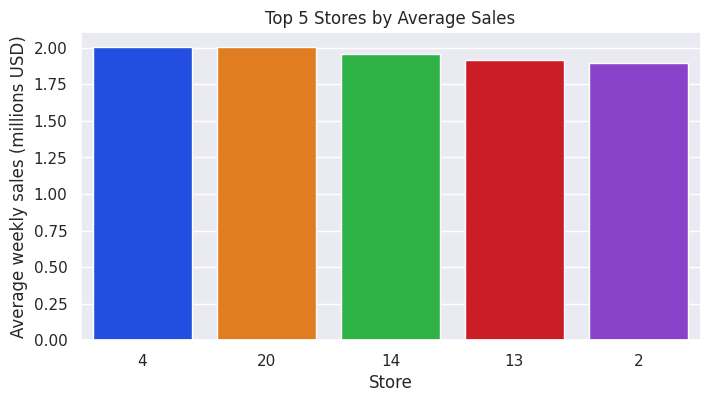

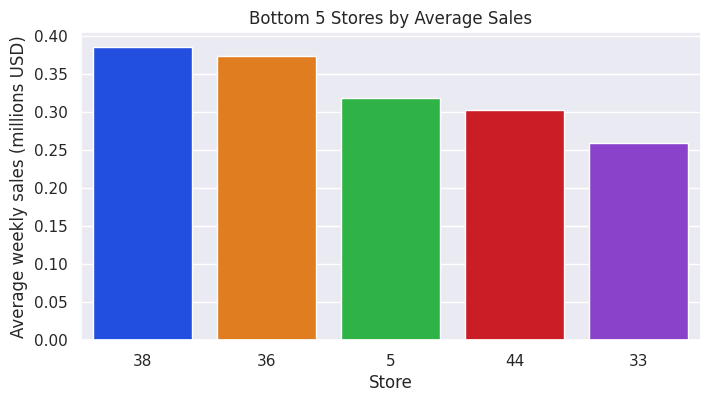

In [48]:
plot_top_and_bottom_stores(df, 'Store')

The graphs show that the top performing stores have relatively stable sales with an average of around $2 million USD. Store 20 appears to be the top performer among these stores, with relatively little variation in sales compared to the other top performers.

On the other hand, the lowest performing stores have higher variations in sales, with the highest sales at around $0.38 million USD. This suggests that there may be more variability in the sales performance of these stores.

**How does non-holiday weekly sales compared to holiday weekly sales?**

In [49]:
# filter out non-holiday and holiday weekly sales
non_holiday_sales = df[df['Holiday_Flag'] == 0]
holiday_sales = df[df['Holiday_Flag'] == 1]

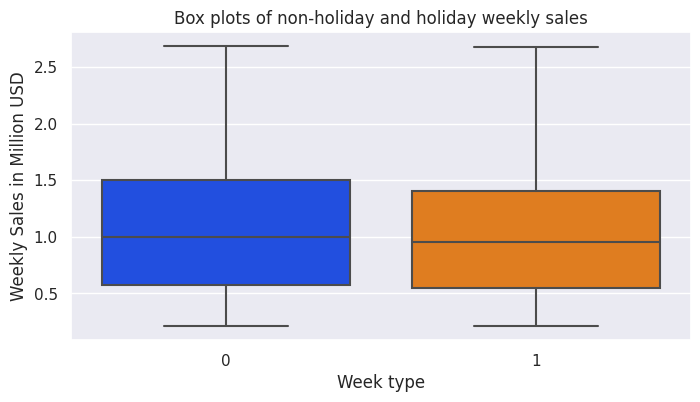

In [50]:
# plot box plots of non-holiday and holiday weekly sales
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(data=[holiday_sales['Weekly_Sales']/1e6, non_holiday_sales['Weekly_Sales']/1e6])
plt.ylabel('Weekly Sales in Million USD')
plt.xlabel('Week type')
plt.title('Box plots of non-holiday and holiday weekly sales')
plt.show()

We can see that both holiday and non-holiday weekly sales have similar spread. However, the bigger sales happen during the holiday weeks.

Of all the weaker correlations, employment is the strongest with 0.11 correlation coefficient.


# **Time Series Model for each Store**

**Check for Stationarity**


*   To check data stationary or not we have to do dickey-fuller test.
*   Check the p value from Dickey Fuller test
*   If p-value > 0.05, data is non-stationary
*   if p-value < 0.05, data is stationary


In [51]:
print(store_list)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [52]:
pip install pmdarima

In [53]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

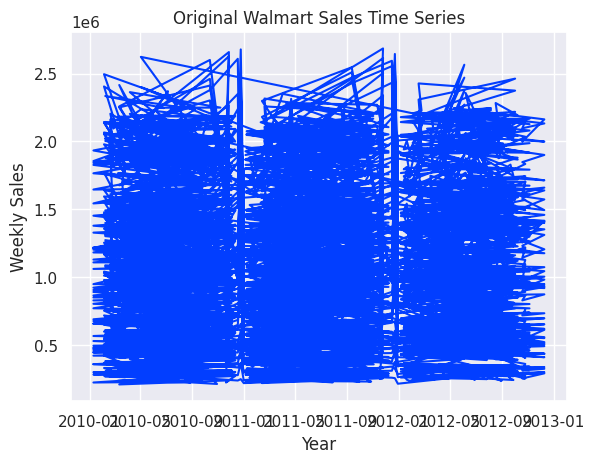

In [54]:
# Plot the original time series
plt.plot(df['Weekly_Sales'])
plt.title('Original Walmart Sales Time Series')
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.show()

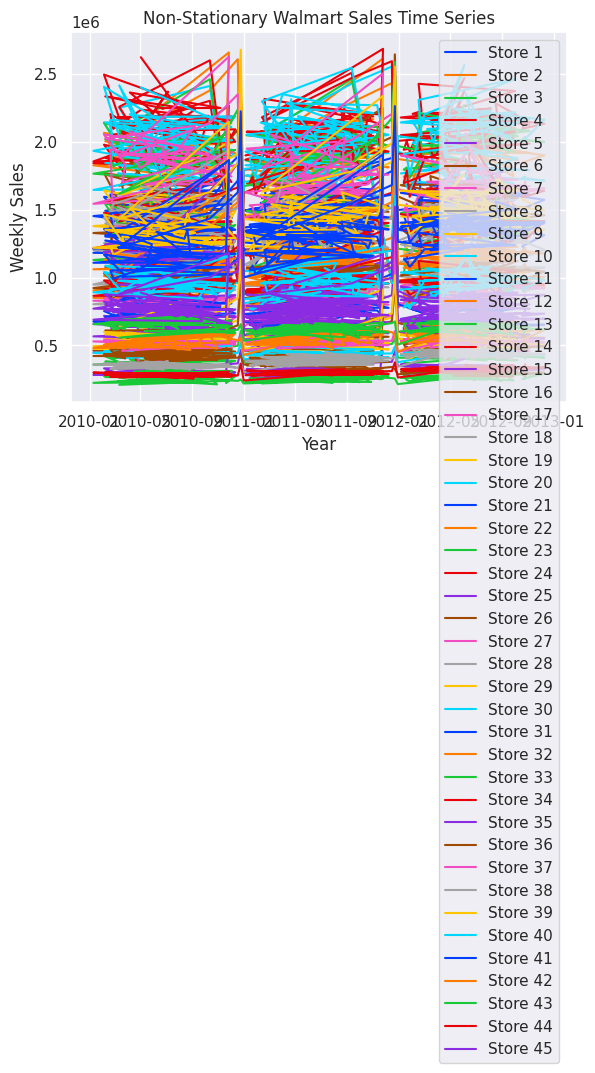

In [55]:
# Group the data by store and plot the non-stationary time series for each store
grouped = df.groupby('Store')
for store, data in grouped:
    plt.plot(data['Weekly_Sales'], label='Store {}'.format(store))

plt.title('Non-Stationary Walmart Sales Time Series')
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.legend(loc='best')
plt.show()

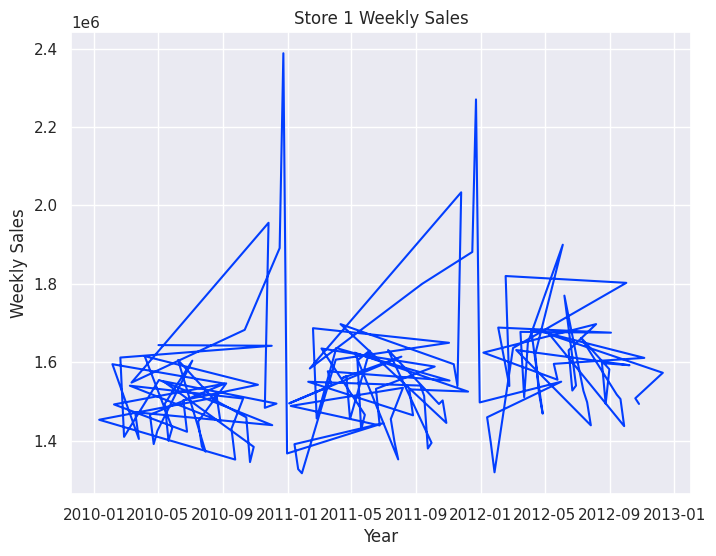

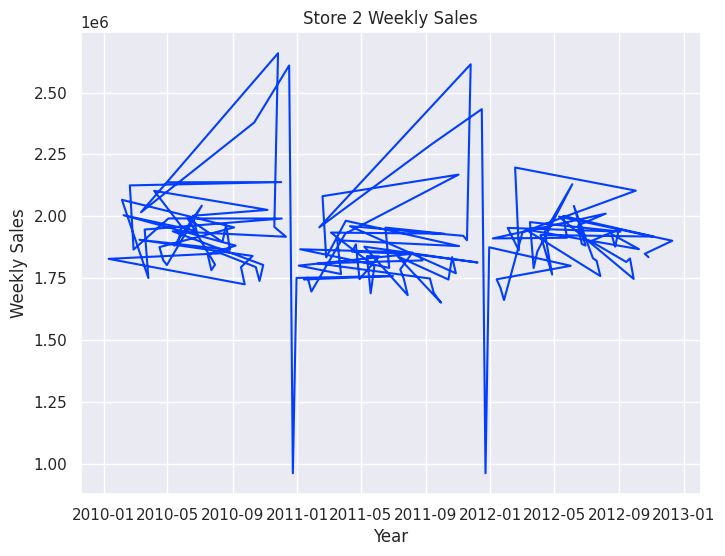

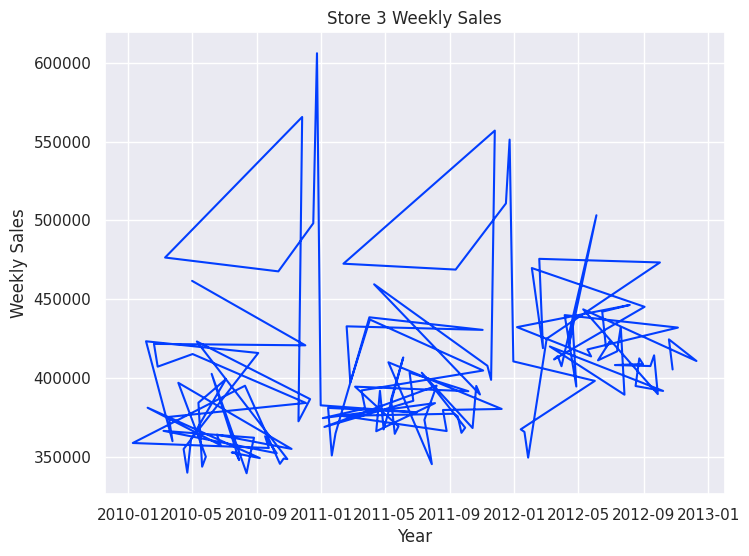

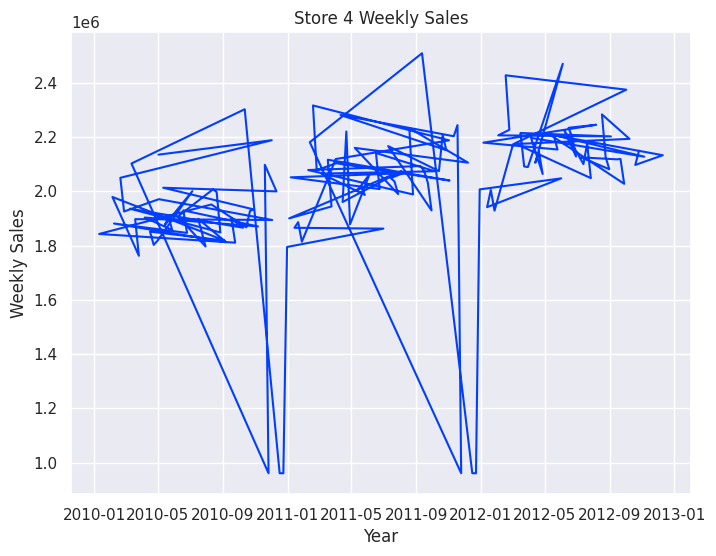

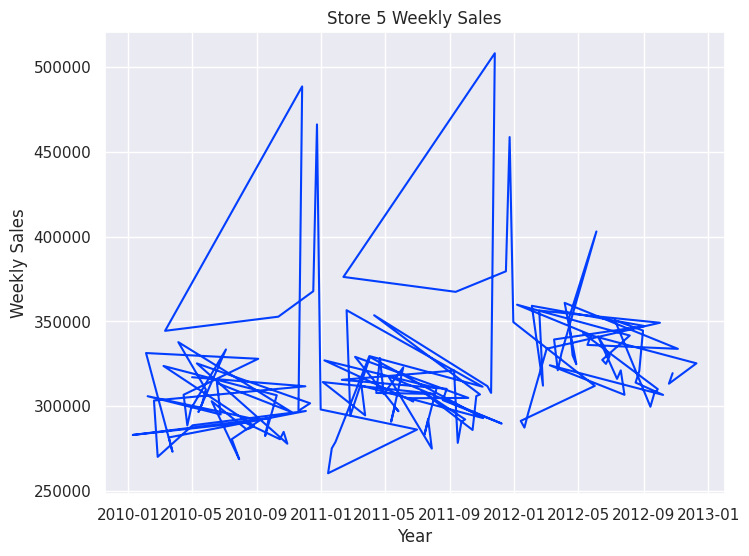

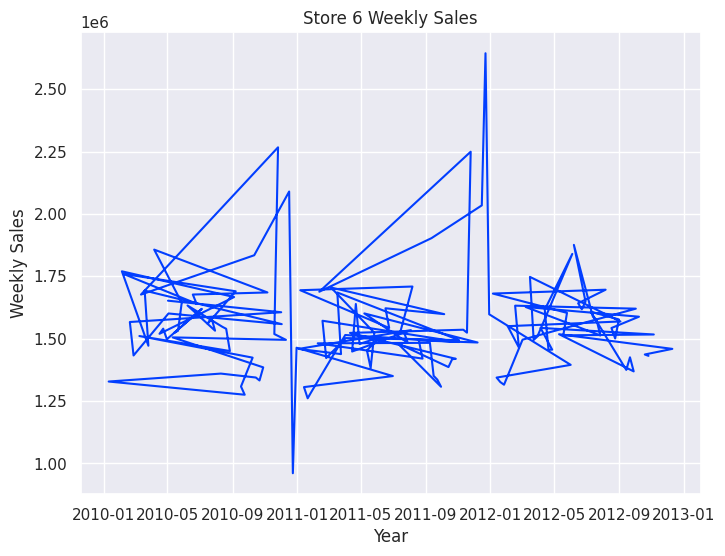

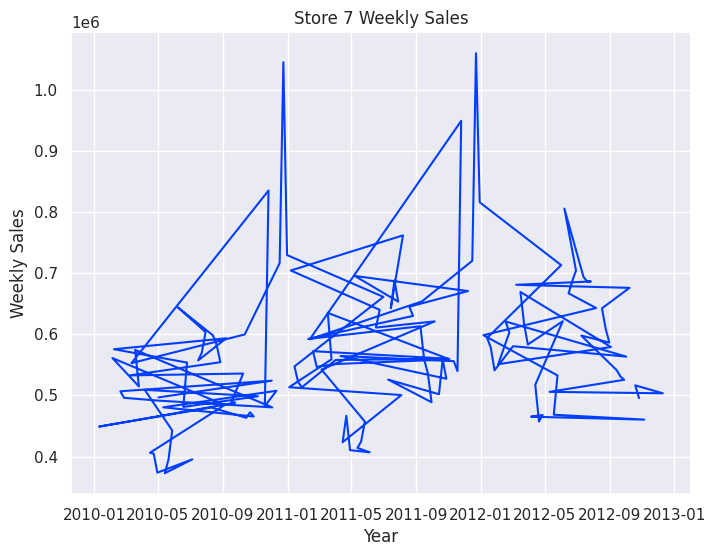

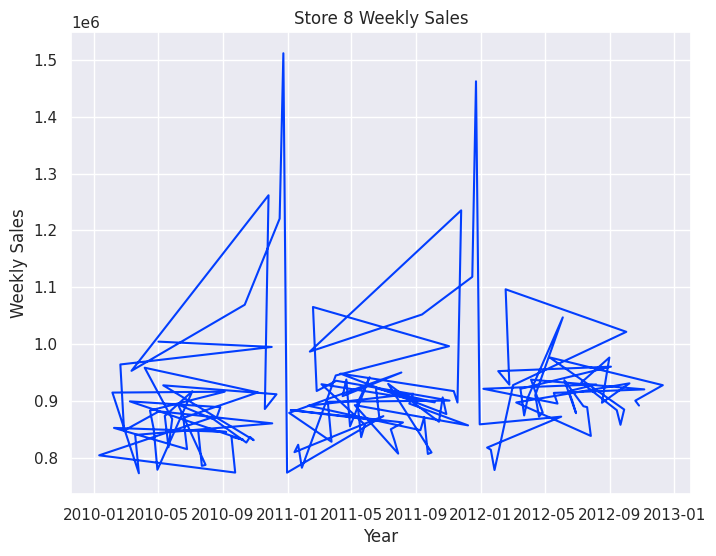

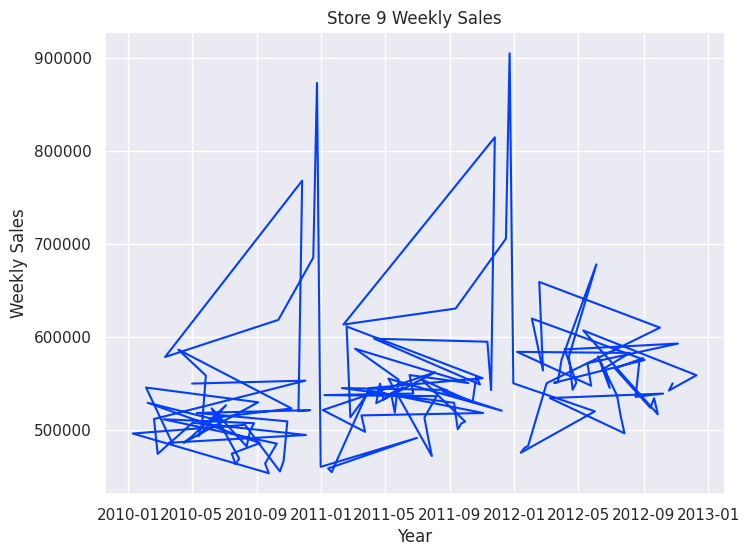

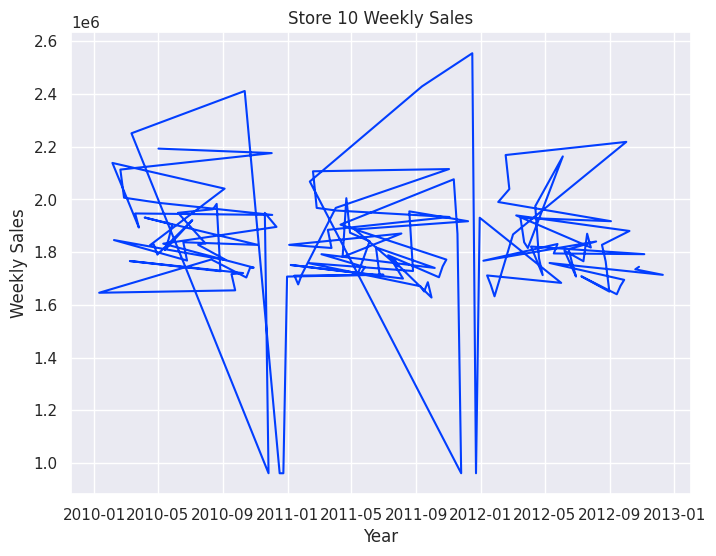

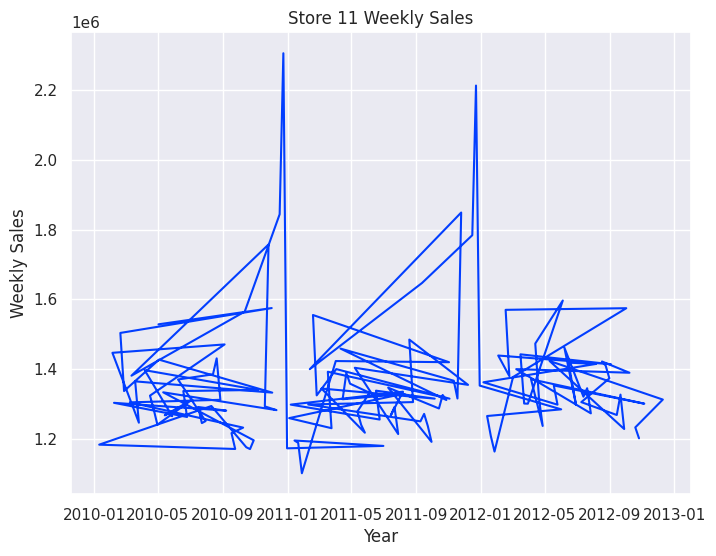

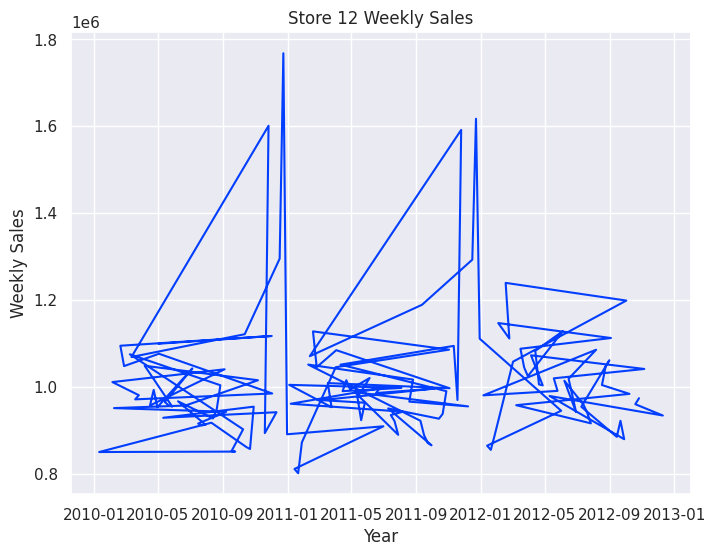

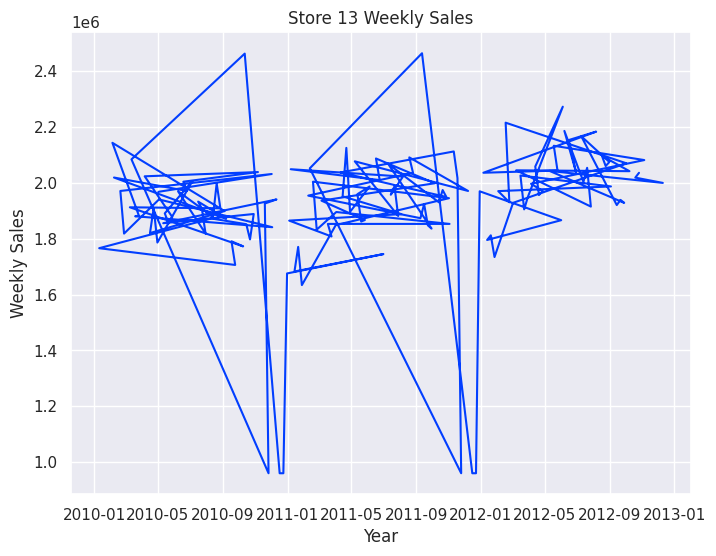

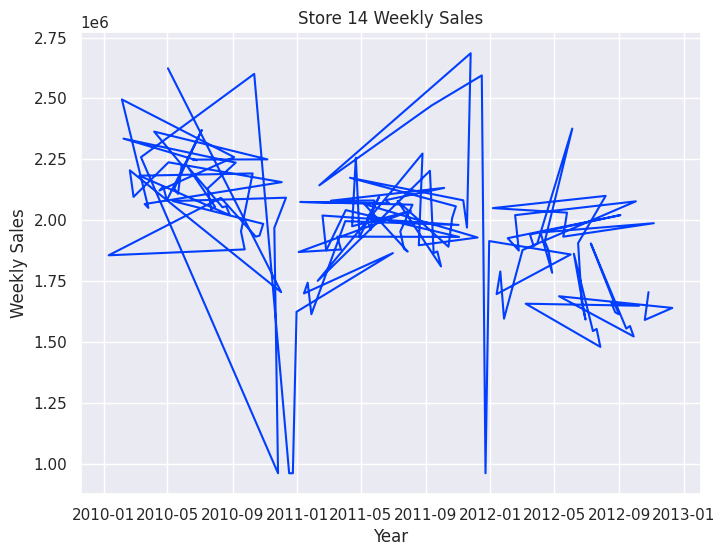

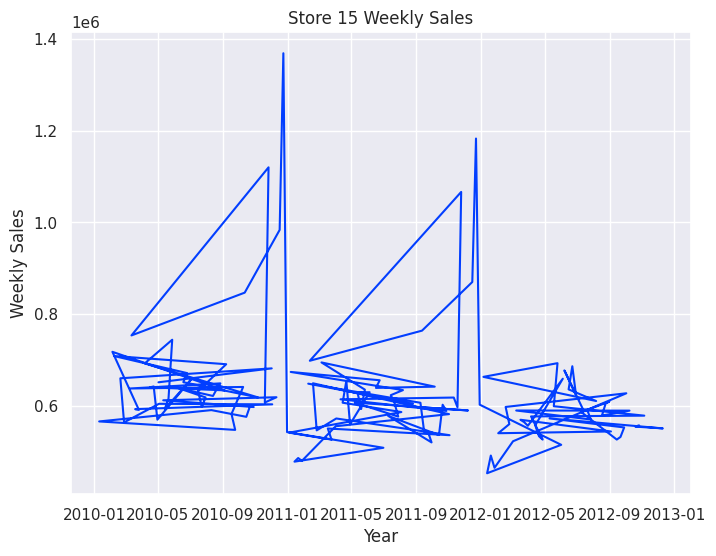

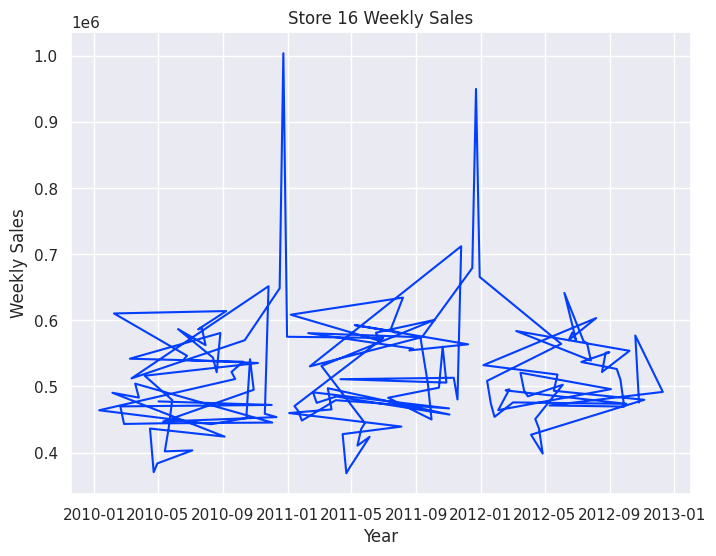

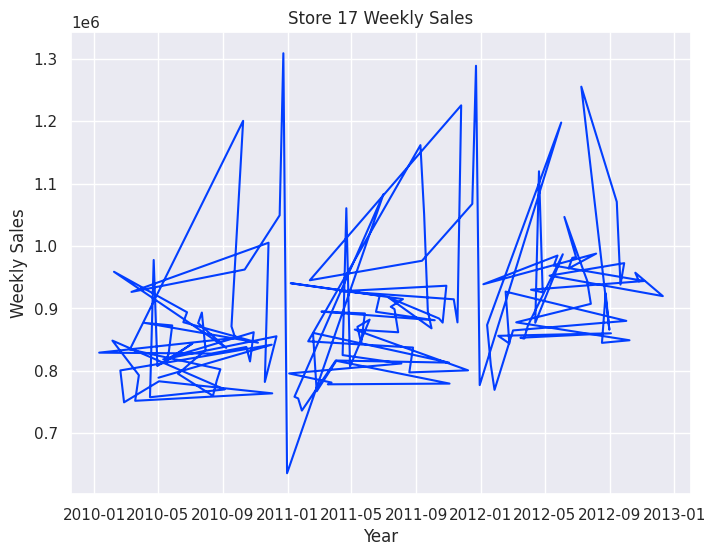

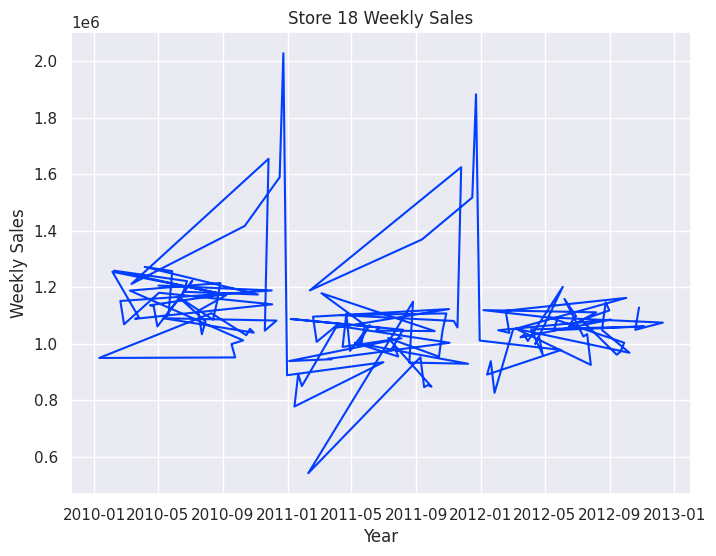

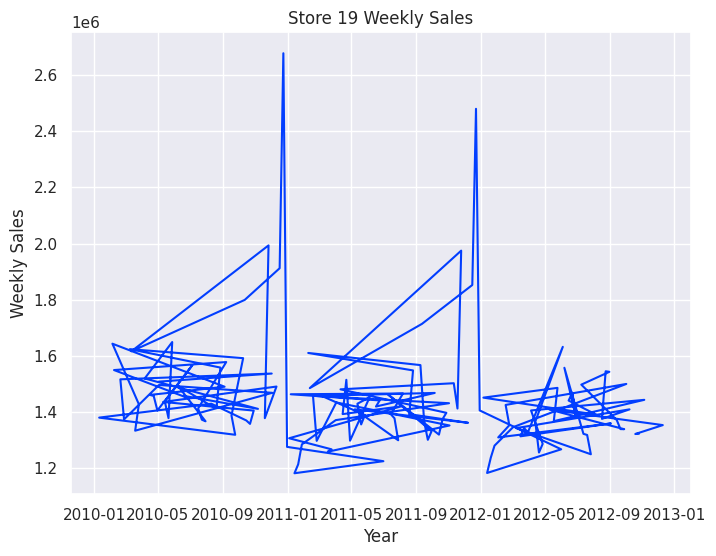

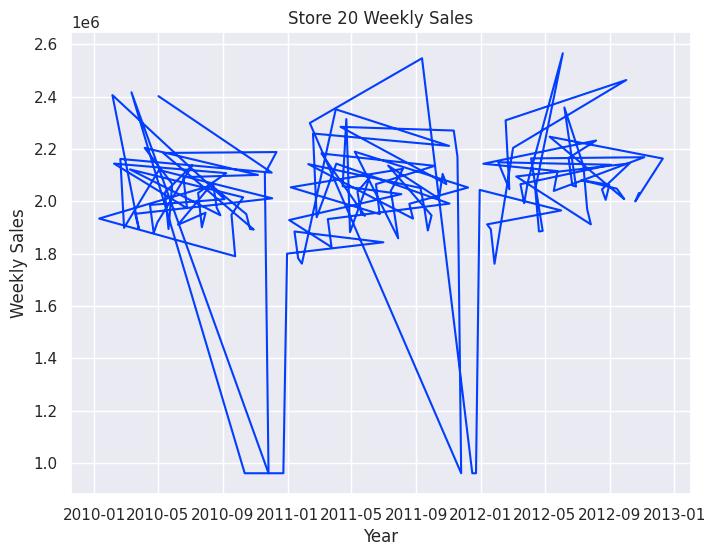

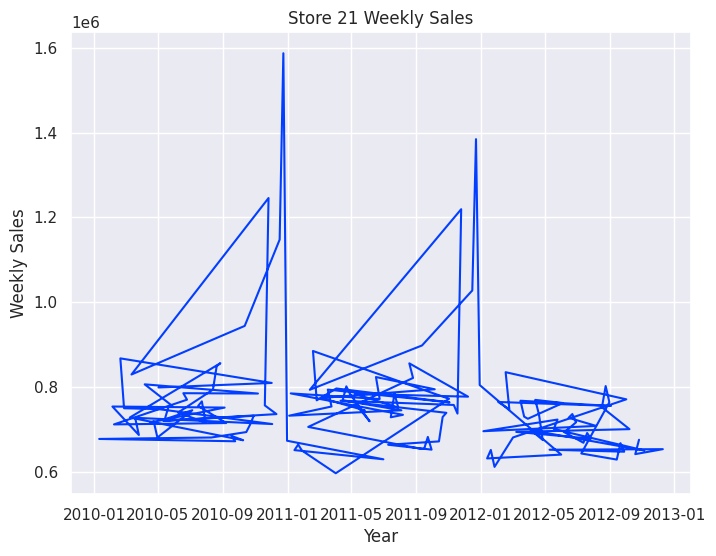

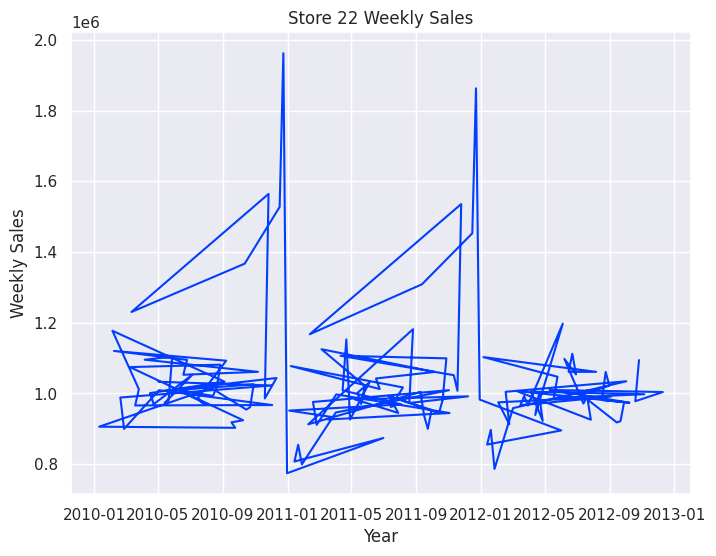

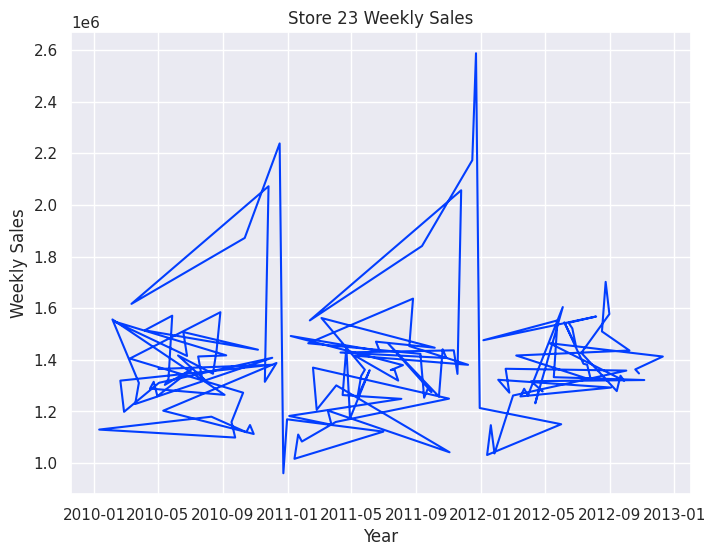

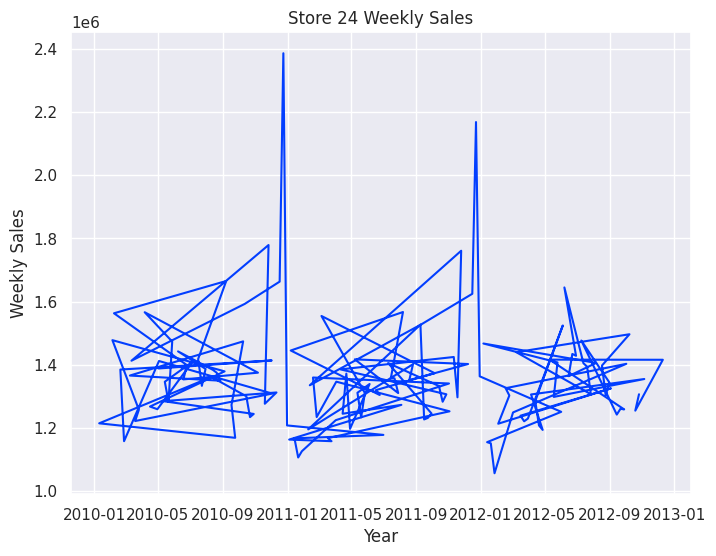

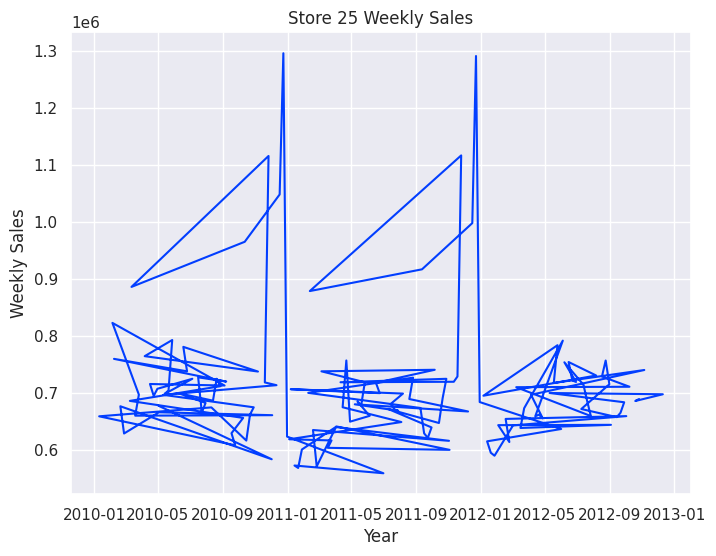

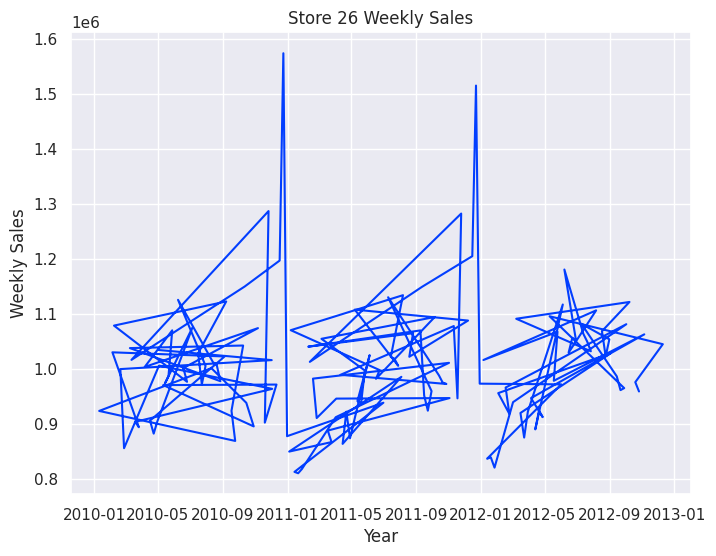

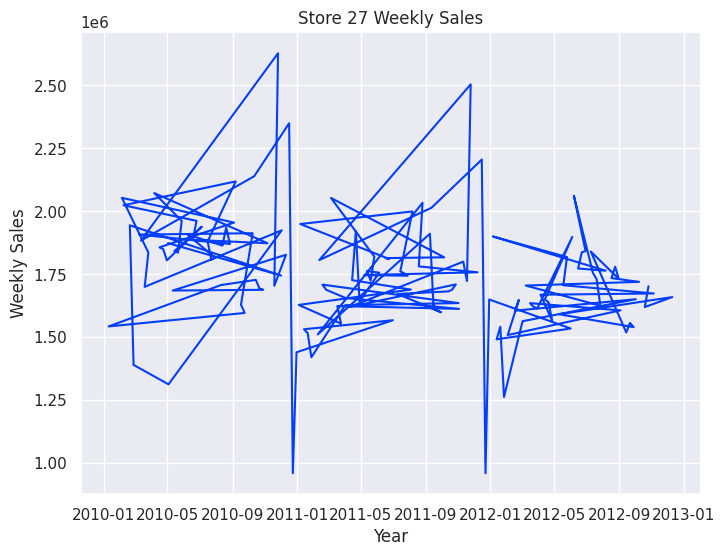

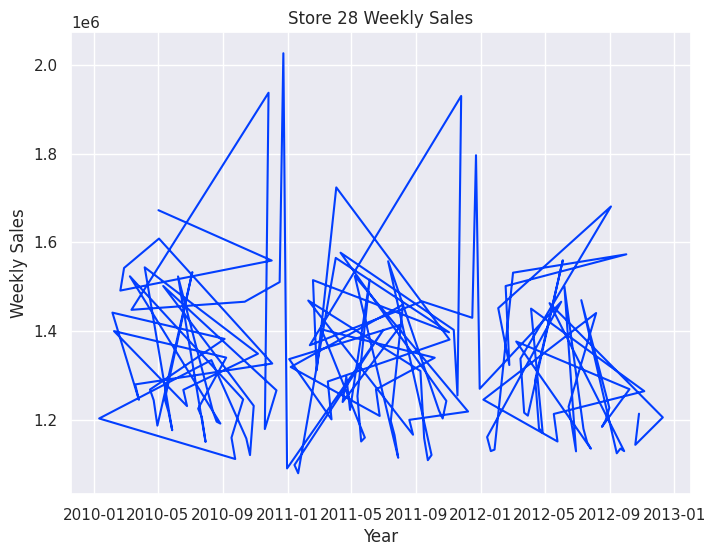

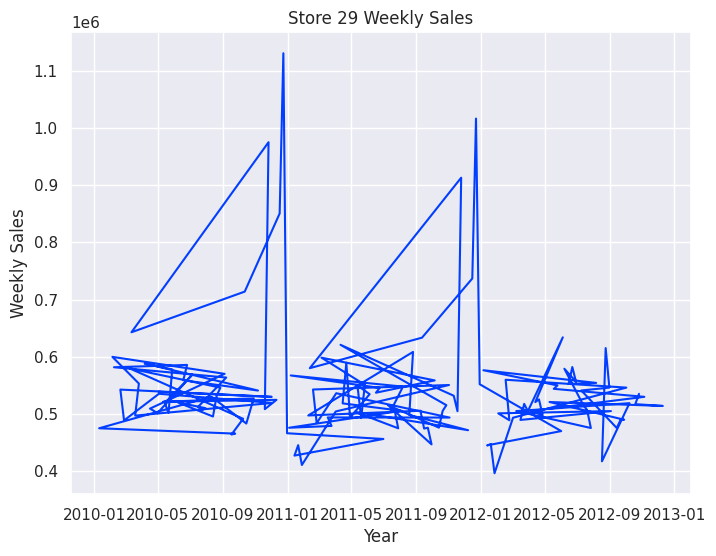

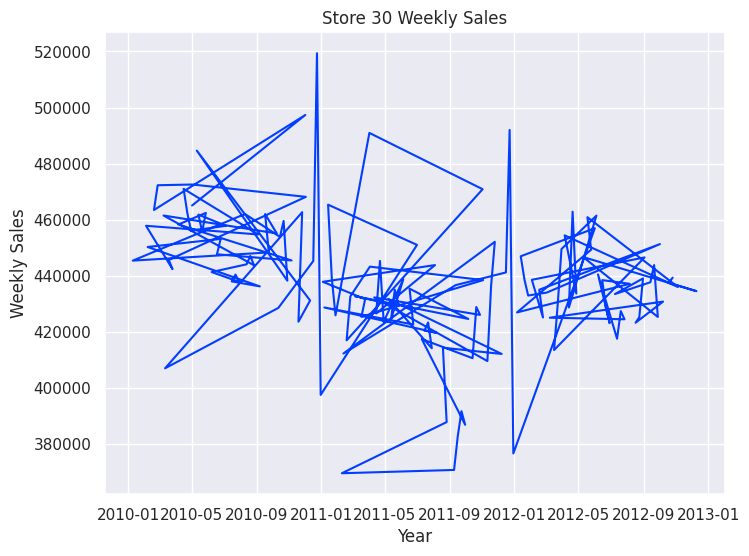

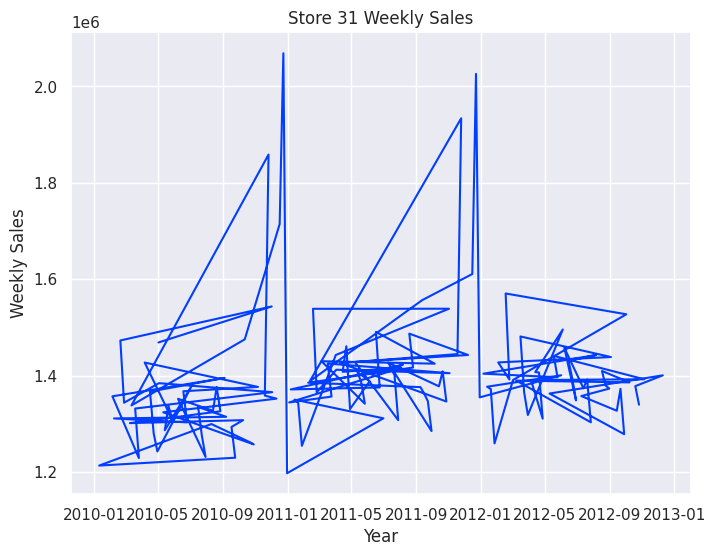

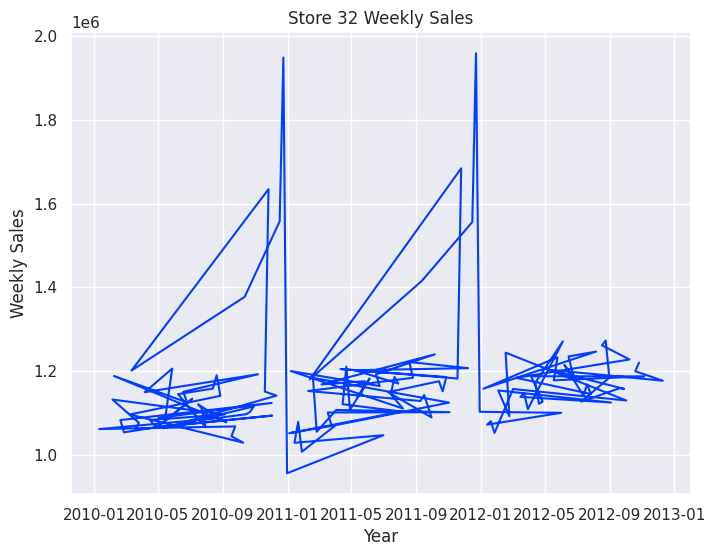

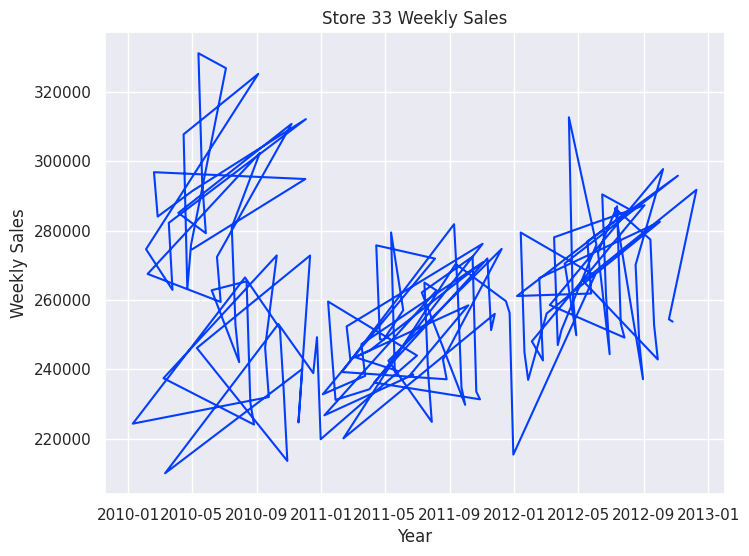

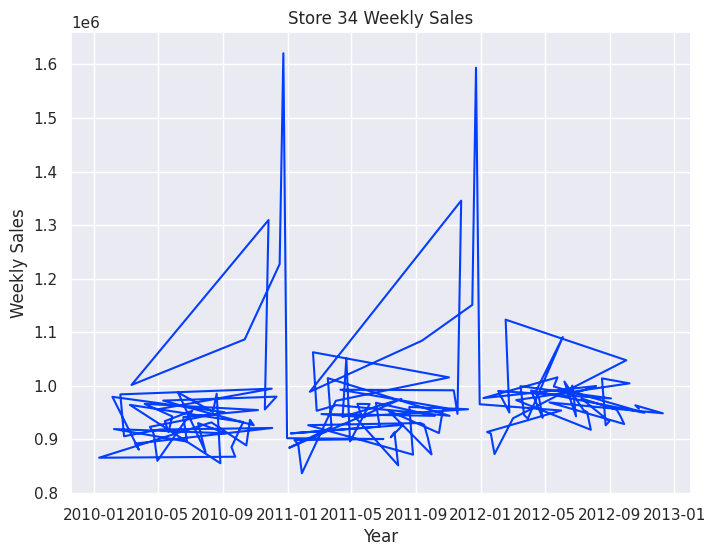

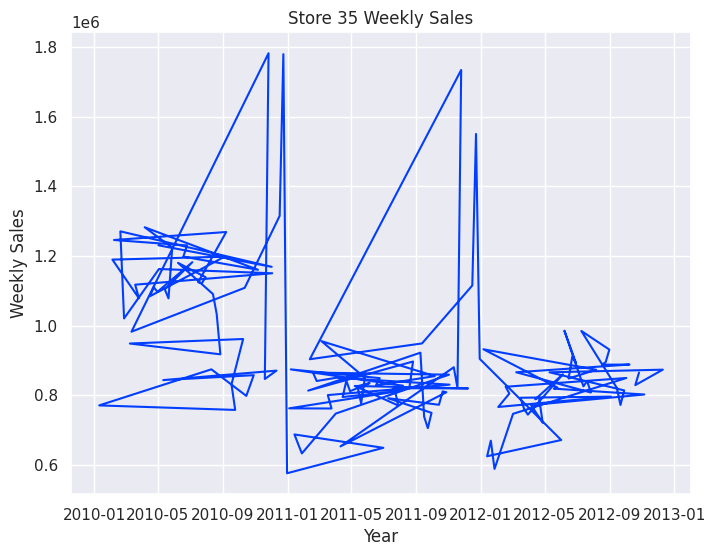

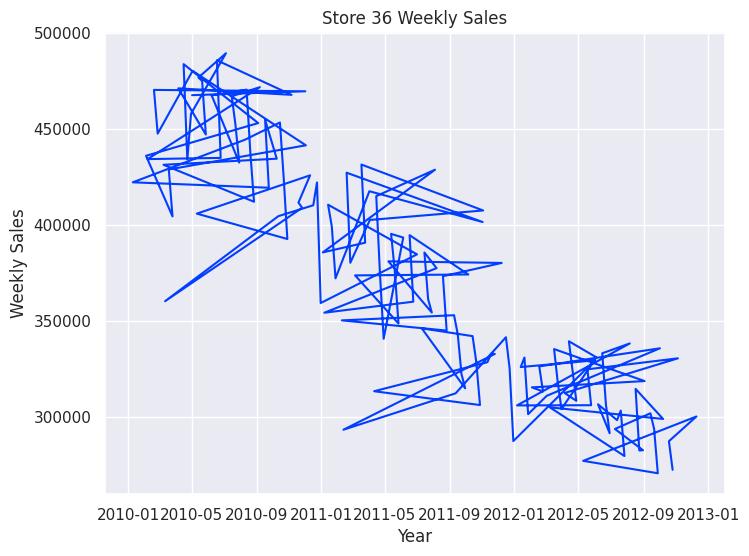

KeyboardInterrupt: ignored

In [56]:
# Group the data by store and plot the non-stationary time series for each store
grouped = df.groupby('Store')
for store, data in grouped:
    # Create a new figure and axes for each store
    fig, axs = plt.subplots(figsize=(8, 6))
    axs.plot(data['Weekly_Sales'])
    axs.set_title('Store {} Weekly Sales'.format(store))
    axs.set_xlabel('Year')
    axs.set_ylabel('Weekly Sales')
    plt.show()

In [ ]:
#check and isolate all stores with non-stationary TS

store_x, store_y = [], []
p_value_x, p_value_y = [], []
Test_stat_x, Test_stat_y = [], []

found_p_value = False

for i in store_list:
    store_df = get_store_df(df, 'Store', i)
    adft = adfuller(store_df['Weekly_Sales'], autolag = 'AIC')

    values = [adft[0], adft[1], adft[2], adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]
    p_value = adft[1]
    Test_stat = adft[0]

    if p_value > 0.05:
        found_p_value
        store_x.append(i)
        p_value_x.append(p_value)
        Test_stat_x.append(Test_stat)
    else:
        store_y.append(i)
        p_value_y.append(p_value)
        Test_stat_y.append(Test_stat)

    #if found_p_value:
    xstores = pd.DataFrame(zip(store_x, p_value_x, Test_stat_x), columns = ['store', 'p_value', 'Test Statistics'])
    ystores = pd.DataFrame(zip(store_y, p_value_y, Test_stat_y), columns = ['store', 'p_value', 'Test Statistics'])

In [ ]:
print(f'\nNon stationary TS (stores): \n Dick Fuller Test Result for p_value greater than 0.05\n {xstores}')
print(f'\nNon stationary TS (stores): \n Dick Fuller Test Result for p_value less than 0.05\n {ystores}')

In [ ]:
#As shown above, 7 store have non-stationary time series and 38 stores have stationary TS
st_TS = ystores['store'].tolist()
non_st_TS = xstores['store'].tolist()

print(f'{len(non_st_TS)} Stores: {non_st_TS} have their p_values greater than 0.05 --> non-stationary TS')

print()
#Stores with stationary TS:
print(f'{len(st_TS)} Stores: {st_TS}\n have stationary TS')

In [ ]:
#select top ten stores from the list with stationary TS for analysis & general inference

highest_weekly_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index().sort_values('Weekly_Sales', ascending = False)

In [ ]:
highest_weekly_sales.head(10)

In [ ]:
#list of stores in ascending order of total weekly sales

stationary_stores = highest_weekly_sales['Store'].tolist()
print(stationary_stores)

In [ ]:
# Extract stationary list from store_list

xcount = 0
stationary_list = []

for i , store in enumerate(stationary_stores):
    if store in non_st_TS:
        continue
    elif xcount< len(stationary_stores):
        stationary_list.append(store)
        xcount += 1
print(f'The stationary stores: {stationary_list}')

In [ ]:
highest_12, highest_10, highest_5, highest_6 = [],[],[],[]

highest_5 = stationary_list[0:5]
highest_6 = stationary_list[0:6]
highest_10 = stationary_list[0:10]
highest_12 = stationary_list[0:12]

print(f'\nHighest 5 stores: {highest_5} \nHighest 6 stores: {highest_6} \nHighest 10 stores: {highest_10}, \nHighest 12 stores: {highest_12}')

**Find Best ARIMA order for the selected stores**

In [ ]:
# series plot of the 15 stores with highest weekly_sales

fig, axes = plt.subplots(4,3, figsize = (25, 20))
plt.subplots_adjust(hspace = 0.5)

j = 1
for i in highest_12:
    store_df = get_store_df(df, 'Store', i)

    plt.subplot(4,3,j)
    store_df['Weekly_Sales'].plot()
    plt.title('Top Highest Weekly Sales, Store No: '+str(i), fontsize = 15)
    plt.ylabel('Weekly_sales', fontsize = 15)
    j = j+1

In [ ]:
plt.figure(figsize=(15,20))
j = 1  # initialize subplot index
for i in highest_10:
    store_df = get_store_df(df, 'Store', i)
    plt.subplot(5, 2, j)
    store_df['Weekly_Sales'].plot()
    plt.title('Top Highest Weekly Sales, Store No: '+str(i), fontsize=15)
    j = j + 1
plt.show()

**Find the best ARIMA order for the 10 highest performing stores**

In [ ]:
for i in highest_10:
    print(f'Highest Weekly_Sales: Best order for ARIMA model for Store #{i}')
    store_df = get_store_df(df, 'Store', i)
    multiplemodels = auto_arima(store_df['Weekly_Sales'], trace = True)
    print('\n**********************************************************************')

In [ ]:
highest_10

# **Predictions**

In [ ]:
def get_predictions(actual, predicted):
    predict_dbf = pd.DataFrame(zip(actual, predicted), columns = ['Actual', 'Predicted'])
    predict_dbf['Error(%)'] = abs(predict_dbf.Actual-predict_dbf.Predicted)*100/predict_dbf.Actual
    predict_dbf = predict_dbf.sort_values(by = ['Error(%)']).reset_index()

    del predict_dbf['index']

    print('\n-------------------Predicted Results-------------------------')
    print(predict_dbf.head(), '\n__________________________________________________')
    median = predict_dbf['Error(%)'].median()
    mean = predict_dbf['Error(%)'].mean()
    print(f'Median error: {round(median, 2)}%')
    print(f'Mean error: {round(mean, 2)}%')
    return(predict_dbf)

In [ ]:
#ARIMA predictions

ARIMA_order = [[2,1,3], [1,0,0], [2,0,0],[5,1,1]]
predictions = list()
Arima_X_train, Arima_X_test = [], []
test_index_list = []
train_index_list = []

for i in highest_10:
    store_df = get_store_df(df, 'Store', i)
    # size for train, test split the data @ 80: 20
    size = int(store_df.shape[0] * 0.80)
    train, test = store_df.iloc[:size, :], store_df.iloc[size:, :]

    Arima_X_train.append(train)
    Arima_X_test.append(test)
    train_index = train.index
    test_index = test.index
    Arimna_test_index = test.index
    Arima_train_index = train.index

    start_1 = train.shape[0]
    end_1 = (train.shape[0] + test.shape[0]) - 1
    actual_1 = test['Weekly_Sales']
    predict_index = actual_1.index
    actual_2 = actual_1.tolist()

    if i==1 or i == 4:
        arima = ARIMA_order[0]
    elif i ==2 or i ==13 or i == 20:
        arima = ARIMA_order[1]
    elif i ==10 or i ==27:
        arima = ARIMA_order[2]
    elif i == 39:
        arima = ARIMA_order[3]

    print(f'\nResult for Store #{i}\n Best ARIMA Order: {arima}')
    model = ARIMA(train['Weekly_Sales'], order = arima)
    model_fit = model.fit()
    print(model_fit.summary())

    predicted_1 = model_fit.predict(start = start_1, end = end_1)
    predicted_2 = pd.DataFrame()
    predicted_2['Weekly_Sales'] = predicted_1
    predicted_2.index = predict_index

    test_index_list.append(test.index)
    train_index_list.append(train.index)
    #store the prediction in the list
    predictions.append(get_predictions(actual_2, predicted_1.tolist()))
#store the prediction for later use
Arima_predict = predictions

In [ ]:
Arima_X_test[0].head(5)

# **Plot Predictions**

In [ ]:
def plot_predictions(predictions, name, store_no):

    fig, axes = plt.subplots(figsize = (20, 6))
    sns.lineplot(x = predictions.index, y = predictions['Actual'], color= 'red', legend = True)
    sns.lineplot(x=predictions.index, y = predictions['Predicted'], color = 'blue', legend = True)
    plt.title(f'Store No: {store_no} ---- {name} Predictions', fontsize = 25)
    plt.xlabel('Data ', fontsize = 15)
    plt.ylabel('Weekly Sales', fontsize = 15)
    plt.legend(['Actual', 'Predicted'], loc = 'best')
    plt.grid(True)
    plt.show()

In [ ]:
def plot_ts_results(predict_df, df_index, model, l=5, w=2, wl=20, ww=10, hs=1.5):
    fig, axes = plt.subplots(l, w, figsize=(wl, ww))
    plt.subplots_adjust(hspace=hs)

    for i in range(len(predict_df)):
        store_df = predict_df[i]

        plt.subplot(l, w, i+1)
        sns.lineplot(x=store_df.index, y=store_df['Actual'])
        sns.lineplot(x=store_df.index, y=store_df['Predicted'])

        plt.title(f'{model}: Prediction Plot for Store {highest_10[i]}', fontsize=25)
        plt.xlabel('Dates ', fontsize=15)
        plt.ylabel('Predicted Weekly Sales', fontsize=15)
        plt.legend(['Actual', 'Predicted'], loc='best')
        plt.grid(True)

    plt.show()

In [ ]:
#Recall list of DataFrame predictions for top 5 sales store
len(predictions)

In [ ]:
test_index_list[0]

In [ ]:
# '''Predictions = []
# for i in range(len(predictions)):
#     Predictions[i].index = test_index_list[i]
#     Predictions.append(predictions[i][['Actual', 'Predicted', 'Error(%)']])
#  '''
Predictions = []
for i in range(len(predictions)):
    pred = predictions[i][['Actual', 'Predicted', 'Error(%)']]
    pred.index = test_index_list[i]
    Predictions.append(pred)

In [ ]:
Predictions[0].head(10)

In [ ]:
plot_ts_results(Predictions, test_index, 'ARIMA', 5,2,25,25,0.5)

In [ ]:
#Extract the predictions for the top 5 stores
store_2_pred = Predictions[0][['Actual', 'Predicted', 'Error(%)']]
store_4_pred = Predictions[1][['Actual', 'Predicted', 'Error(%)']]
store_10_pred = Predictions[2][['Actual', 'Predicted', 'Error(%)']]
store_13_pred = Predictions[3][['Actual', 'Predicted', 'Error(%)']]
store_20_pred = Predictions[4][['Actual', 'Predicted', 'Error(%)']]

In [ ]:
store_2_pred.head()

In [ ]:
store_4_pred.head()

In [ ]:
store_10_pred.head()

In [ ]:
store_13_pred.head()

In [ ]:
store_20_pred.head()

**12-Weeks Forecast**

In [ ]:
#Extract last date for store 2

begin_date = str(store_2_pred.tail(1).index)
begin_date

In [ ]:
from datetime import datetime
from datetime import timedelta

begin_date = '2012-10-26'
Bg_date = datetime.strptime(begin_date, '%Y-%m-%d')
end_date = Bg_date + timedelta(days=84)

print(f'Begin_date: {begin_date}, \nEnd_date: {end_date}')

In [ ]:
df[df['Store'] == 1].index[-1]

In [ ]:
#Generate date range from last date(store_1) for 12 weeks:

from datetime import datetime, timedelta
start_date = df[df['Store'] == 1].index[-1] + timedelta(weeks = 5)
end_date = start_date + timedelta(weeks = 12)

Index = pd.date_range(start = start_date, end = end_date, freq = 'w')

print(Index)

In [ ]:
# set Index for Prediction

no_of_wks = len(Index)
print(f'Number of weeks = {no_of_wks}  |   {round(no_of_wks/52, 2)} years')

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

In [ ]:
#Helper function
def remove_outliers(dbf):
    dataset = sorted(dbf.Weekly_Sales)
    q1, q3 = np.percentile(dataset, [25, 75])
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)

    return(dbf[dbf.Weekly_Sales < upper_fence])

In [ ]:
#Forecast without detrending
#SERIMA Forecast without detrending

j = 1
ARIMA_order = [[2.,1,3],[1,0,0],[2,0,0],[5,1,1]]
season_order = [[2,1,3,7],[1,0,0,7],[2,0,0,7],[5,1,1,7]]
Forecast_1 = pd.DataFrame()
forecast_1 = list()
current_df, predicted_list = [],[]
train_index_list, test_index_list = [],[]
predictions, forecast_list = [],[]

for i in highest_10:
    store_df = get_store_df(df, 'Store', i)
    store_index = store_df.index
    store_df = pd.DataFrame(store_df['Weekly_Sales'], columns=['Weekly_Sales'], index=store_index)
    #remove outliers
    #store_df = remove_outliers(store_df)

    size = int(store_df.shape[0]*0.75) #size for train, test split the data @75:25
    train, test = store_df.iloc[:size, :], store_df.iloc[size:,:]

    start_1 = train.shape[0]
    end_1 = (train.shape[0] + test.shape[0])-1

    train_index = train.index
    test_index = test.index

    if i==1 or i == 4:
        arima_order = ARIMA_order[0]
        Season_order = season_order[0]

    elif i ==2 or i ==13 or i == 20:
        arima_order = ARIMA_order[1]
        Season_order = season_order[1]
    elif i ==10 or i ==27:
        arima_order = ARIMA_order[2]
        Season_order = season_order[2]
    elif i == 39:
        arima_order = ARIMA_order[3]
        Season_order = season_order[3]

    model = SARIMAX(train, order = arima_order, seasonal_order = Season_order, initialization='approximate_diffuse')
    #model fit
    model = model.fit()

    forecast = model.forecast(steps = no_of_wks).tolist() # 12-weeks forecast
    forecast_1.append(forecast)
    forecast_list.append(forecast)

    #Forecast

    forecast = pd.DataFrame(forecast, columns = ['Weekly_Sales'], index = Index)
    current_df.append(train)
    train_index_list.append(train.index)
    test_index_list.append(test.index)

    #Predictions
    predicted_ = model.predict(start = start_1, end = end_1, dynamic = True)
    predicted_list.append(predicted_)

    print()
    print(f'Weekly Sales Predictions for store{i}')
    predictions.append(get_predictions(test.values.flatten(), predicted_))#store the predictions in a list

In [ ]:
Predictions = []
for i in range(len(predictions)):
    pred = predictions[i][['Actual', 'Predicted', 'Error(%)']]
    pred.index = test_index_list[i]
    Predictions.append(pred)

In [ ]:
Predictions[0].head(10)

In [ ]:
#Plot Predictions

plot_ts_results(Predictions, test_index, 'SARIMAX', 5, 2, wl = 25, ww = 25, hs = 0.5)

In [ ]:
def plot_ts_forecast(forecast_, Index, Train_df, l = 5, w = 2, wl = 20, ww = 10, hs = 1.5, plot_current = 0):
    fig, axes = plt.subplots(l, w, figsize = (wl, ww))
    plt.subplots_adjust(hspace = hs)
    j = 1

    for i, store_no in enumerate(highest_10):

        forecast_df = pd.DataFrame(forecast_[i], columns = ['Forecast'], index = Index)
        train_df = pd.DataFrame(Train_df[i], columns = ['Weekly_Sales'], index = train.index)

        plt.subplot(l, w, j)
        sns.lineplot(x=forecast_df.index, y=forecast_df.Forecast)
        if plot_current == 1:
            sns.lineplot(x = train_df.index, y = train_df.Weekly_Sales)

        plt.title(f'{no_of_wks} Weeks forecast plot for store {store_no}', fontsize = 25)
        plt.xlabel('Dates', fontsize = 15)
        plt.ylabel('Forecast Weekly Sales', fontsize = 9)
        plt.grid(True)

        j = j+1

In [ ]:
forecast_list[0]

In [ ]:
# show forecasts for selected stores
Forecast = pd.DataFrame(index= Index)
for i in range(len(highest_10)):
    Forecast['store_'+str([highest_10[i]])] = forecast_1[i]

Forecast.head()

In [ ]:
Forecast.shape

**Forecast Plot(summary) - non Detrended TS**

In [ ]:
plot_ts_forecast(forecast_1, Index, current_df, 5, 2, 25, 25, 0.7, 0)

**Observations**



1.   The result of the forecast is highly affected by the size of the training/testing dataset
2.   Downward sales forecast for stores: 20, 13, 2, and 27
3.   Stores: [1, 4, 6, 10, 19, 39] have similar trends in the forecast

In [ ]:
# Reforecast for stores for the subset of stores with similar forecast trends
# stores: [1, 4, 6, 10, 19, 39]
df_new = df[((df['Store'] == 1) | (df['Store'] == 4) | ((df['Store'] == 6) | (df['Store'] == 10)) | ((df['Store'] == 19) | (df['Store'] == 39)))]

In [ ]:
df_new.head()

In [ ]:
df_new.shape

In [ ]:
#confirm the stores in df_new

new_store_list = df_new['Store'].unique()
new_store_list

In [ ]:
def plot_new_forecasts(store_df, dbf = forecast):
    fig, axes = plt.subplots(figsize = (15, 4))

    sns.lineplot(x = dbf.index, y = dbf.Weekly_Sales, color = 'red')
    sns.lineplot(x = store_df.index, y = store_df.Weekly_Sales, color = 'green')
    plt.title(f'{len(Index)} Weeks forecast plot for store {new_store_list}', fontsize = 25)
    plt.xlabel('Dates', fontsize = 15)
    plt.ylabel('Weekly Sales', fontsize = 9)
    plt.grid(True)
    plt.show()

In [ ]:
#check outliers on the weekly sales

store_df = df_new.copy()
sns.boxplot(store_df['Weekly_Sales'])

In [ ]:
# Remove outliers
print(f'shape before {store_df.shape[0]} Outlier removal')
store_df = remove_outliers(store_df)
print(f'shape after {store_df.shape[0]} Outlier removal')

In [ ]:
#Boxplot to recheck for outliers on weekly sales

sns.boxplot(store_df['Weekly_Sales'])

In [ ]:
#obtain best Arima for store_df

multiplemodels = auto_arima(store_df['Weekly_Sales'], trace = True)

In [ ]:
#forecast for thr new_df
#SARIMA forecast without detrending

arima_order = [1, 1, 2]
season_order = [1, 1, 2, 7]

store_index = store_df.index
store_df = pd.DataFrame(store_df['Weekly_Sales'], columns = ['Weekly_Sales'], index = store_index)

size = int(store_df.shape[0] * 0.75) #size for train , test split the data @ 75:25
train, test = store_df.iloc[:size, :], store_df.iloc[size:, :]

start_1 = train.shape[0]
end_1 = (train.shape[0] + test.shape[0])-1

train_index = train.index
test_index = test.index

model = SARIMAX(train, order = arima_order, seasonal_order = season_order, initialization = 'approximate_diffuse')
model = model.fit()

forecast = model.forecast(steps = no_of_wks).tolist()
forecast = pd.DataFrame(forecast, columns = ['Weekly_Sales'], index = Index)

current_df = train

predicted_ = model.predict(start = start_1, end = end_1, dynamic = True)

predicted = get_predictions(test.values.flatten(), predicted_)

In [ ]:
forecast

In [ ]:
plot_new_forecasts(df_new[df_new['Store'] == 1])

In [ ]:
# expand the sales forecast plot

fig, axes = plt.subplots(figsize = (12, 3))
sns.lineplot(x = forecast.index , y = forecast.Weekly_Sales, color = 'green')
plt.title(f'{len(Index)} week forecast plot for stores: {new_store_list}', fontsize = 18)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Weekly Sales', fontsize = 15)
plt.grid(True)
plt.show()

In [ ]:
def format_number(number):
    return('{:,}'.format(number))

In [ ]:
Max = format_number(round(forecast.Weekly_Sales.max(), 2))
Min = format_number(round(forecast.Weekly_Sales.min(), 2))
Mean = format_number(round(forecast.Weekly_Sales.mean(), 2))
Summary = pd.DataFrame([Max, Min, Mean], columns = ['Summary_Matrics'], index = ['Max', 'Min', 'Mean'])
Summary

In [ ]:
#Extract the max, min, mean sales forecast for the stores

summary_1 = pd.DataFrame(index = ['Max', 'Min', 'Mean'])

for store_no in new_store_list:
    store_df = get_store_df(df, 'Store', store_no)
    max_sales = format_number(round(store_df.Weekly_Sales.max(), 2))
    min_sales = format_number(round(store_df.Weekly_Sales.min(), 2))
    mean_sales = format_number(round(store_df.Weekly_Sales.mean(), 2))
    matrics = [max_sales, min_sales, mean_sales]

    summary_1['store_'+str(store_no)] = matrics
summary_1

In [ ]:
summary_1['Summary_Matrics'] = Summary['Summary_Matrics']

In [ ]:
summary_1 = summary_1[['Summary_Matrics', 'store_1', 'store_4', 'store_6', 'store_10', 'store_19', 'store_39']]

In [ ]:
summary_1.T

Insights from the forecast results

1.   There is lower sales forecast for all stores for the next 12-weeks
2.   All the stores under review will perform better than their mean sales return.

In [ ]:
#show predicted df

predicted

In [ ]:
#prediction Error is exponentially grow
#show error plot

plt.plot(predicted['Error(%)'])
plt.show()

In [ ]:
#Summary

max_error = predicted['Error(%)'].max()
min_error = predicted['Error(%)'].min()
mean_error = predicted['Error(%)'].mean()
Summary_2 = pd.DataFrame([max_error, min_error, mean_error], columns = ['New_Matrics'], index = ['Max', 'Min', 'Mean'])
Summary_2

In [ ]:
#Recall the summary matrix from previuos analysis

summary_1

In [ ]:
summary_1['New_Matrics'] = Summary_2['New_Matrics']
summary_1 = summary_1[['Summary_Matrics', 'New_Matrics', 'store_1', 'store_4', 'store_6', 'store_10', 'store_19', 'store_39']]

In [ ]:
summary_1

In [ ]:
#Summary_Matrics --> matrics obtained when the stores were handled separately
#New_Matrics --> matrics obtained when the store with like trends were combined

summary_1.T

**Conslusion: Forecast with the stores grouped together is worse than was obtained when each store was handled separately**

Given that none of the above results is satisfactory, The top 10 weekly_sales store data was detrended and a new forecast was made

In [ ]:
#List of stores with Stationary Ts

print(f'{len(store_list)} stores with Stationary Ts\n {store_list}')

In [ ]:
#Remove trends from the time series

df1 = pd.DataFrame(df['Weekly_Sales'])

rolling_means = df1.rolling(window = 7).mean()
rolling_mean_detrended = df1 - rolling_means

In [ ]:
fig, axes = plt.subplots(10, 2, figsize=(15, 40))
plt.subplots_adjust(hspace = 1.0)

m, n, = 0, 0
for i, j in enumerate(highest_10):
    store_df = get_store_df(df, 'Store', j)

    m = n+1
    n = m+1

    a1 = plt.subplot(10, 2, m)
    a2 = plt.subplot(10, 2, n)
    m = i + 1

    rolling_mean_detrended.plot(color = 'tab:red', title = f'Store{j}: Differenced with rolling mean over 7 days', ax = a1, fontsize = 9)
    store_df['Weekly_Sales'].plot(color = 'tab:blue', title = f'Store{j}: Original Values', ax= a2, fontsize = 9)

In [ ]:
#Seasonal Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
rolling_mean_detrended['Store'] = df['Store']
rolling_mean_detrended.head()

In [ ]:
data = rolling_mean_detrended.dropna()
data.head()

In [ ]:
#series, model = 'additive', period =  1
#fig, axes = plt.subplots(8, 2, figsize = (15, 40))

plt.subplots_adjust(hspace = 1.0)

for i in highest_10:
    store_df = get_store_df(data, 'Store', i)
    store_df = pd.DataFrame(store_df)
    d_res = seasonal_decompose(store_df['Weekly_Sales'], period = 7)

    d_res.plot()

In [ ]:
rolling_mean_detrended.shape

In [ ]:
#Remove Seasonality from the TS

r_m_d = rolling_mean_detrended.copy()
r_m_d1 = rolling_mean_detrended.copy()

r_m_d = pd.DataFrame(r_m_d)
r_m_d.head()

In [ ]:
r_m_d = r_m_d.dropna()
r_m_d.head()

In [ ]:
r_m_d.shape

In [ ]:
# from pandas.core.window import rolling
# remove seasonality
#shift() - it just shift index by desired number of periods with an optimal time frequency
r_m_d_1 = pd.DataFrame((r_m_d['Weekly_Sales'] - r_m_d['Weekly_Sales'].shift()))
r_m_d_1.head()

In [ ]:
r_m_d_1['Store'] = r_m_d['Store']
r_m_d_1.head(10)

In [ ]:
r_m_d_1.shape

In [ ]:
r_m_d_1 = r_m_d_1.dropna()

In [ ]:
r_m_d_1.shape

In [ ]:
highest_5

In [ ]:
highest_6

In [ ]:
# plot the new TS after detrended and removing Seasonality

fig, axes = plt.subplots(6, 2, figsize=(20, 20))
plt.subplots_adjust(hspace = 1.0)

m, n, = 0, 0
for i, j in enumerate(highest_6):
    #detrended TS
    store_r_m_d = get_store_df(r_m_d_1, 'Store', j)
    #original TS
    store_df = get_store_df(df, 'Store', j)

    m = n+1
    n = m+1

    a1 = plt.subplot(6, 2, m)
    a2 = plt.subplot(6, 2, n)
    m = i + 1

    store_r_m_d['Weekly_Sales'].plot(color = 'tab:red', title = f'{len(highest_6)} High weekly_sales - store{j}: rolled/differenced is', ax = a1, fontsize = 9)
    store_df['Weekly_Sales'].plot(color = 'tab:blue', title = f'{len(highest_6)} High weekly_sales - Store{j}: Original Values', ax= a2, fontsize = 9)


In [ ]:
highest_10

In [ ]:
#Find Best ARIMA ORDER FOR THE ROLLED & DIFFERENCED TS

for i in highest_10:
    print(f'Highest Weekly_Sales: Best order for ARIMA model for Store #{i}')
    store_df = get_store_df(r_m_d_1, 'Store', i)
    multiplemodels = auto_arima(store_df['Weekly_Sales'], trace = True)
    print('\n**********************************************************************')

In [ ]:
# Forecast with the Rolled & Differenced TS
# SERIMA forecast

predictedList = list()
Forecast = pd.DataFrame()
s_ARIMA_order = [[2,0,3], [1,0,3],[5,0,1],[1,0,4],[5,0,2],[0,0,5]]
s_season_order = [[2,0,3,7], [1,0,3,7],[5,0,1,7],[1,0,4,7],[5,0,2,7],[0,0,5,7]]
forecasst_list, train_list = [], []
Forecast_df = list()

for i in highest_10:
    store_r_m_d = get_store_df(r_m_d_1, 'Store', j)
    store_index = store_df.index
    store_df = pd.DataFrame(store_df['Weekly_Sales'], columns = ['Weekly_Sales'], index = store_index)
    store_df = remove_outliers(store_df)
    size = int(store_df.shape[0]*0.75)
    train, test = store_df.iloc[:size, :], store_df.iloc[size:,:]

    start_1 = train.shape[0]
    end_1 = (train.shape[0] + test.shape[0]) - 1

    train_index = train.index
    test_index = test.index

    if i == 10 or i == 13 or i == 20 or i == 27:
        arima_order = s_ARIMA_order[0]
        season_order = s_season_order[0]
    elif i == 4 or i == 6:
        arima_order = s_ARIMA_order[1]
        season_order = s_season_order[1]
    elif i == 39:
        arima_order = s_ARIMA_order[2]
        season_order = s_season_order[2]
    elif i == 2:
        arima_order = s_ARIMA_order[3]
        season_order = s_season_order[3]
    elif i == 1:
        arima_order = s_ARIMA_order[4]
        season_order = s_season_order[4]
    elif i == 19:
        arima_order = s_ARIMA_order[5]
        season_order = s_season_order[5]

    #forecast with serima
    model = SARIMAX(train, order = arima_order, seasonal_order = season_order, initialization = 'approximate_diffuse')
    model = model.fit()
    forecast = model.forecast(steps = no_of_wks).tolist()
    forecast_df = pd.DataFrame(forecast, columns = ['Weekly_Sales'], index=Index)
    Forecast_df.append(forecast_df)
    forecast_list.append(forecast)
    train_list.append(train)

    predicted_ = model.predict(start = start_1, end = end_1, dynamic = True)
    predicted_list.append(predicted_)

    print(f'Weekly Sales Predictions for store{i}')
    #store the predictions in a list
    predictions.append(get_predictions(test.values.flatten(), predicted_))

In [ ]:
test.shape

In [ ]:
train.head(10)

In [ ]:
# show the new forecast results

Forecast = pd.DataFrame(index = Index)
for i in range(len(highest_10)):
    Forecast['store_'+str(highest_10[i])] = forecast_list[i]
Forecast

In [ ]:
plot_ts_forecast(forecast_list, Index, train_list, 5, 2, wl = 25, ww = 25, hs = 1.0)

In [ ]:
train_list[0].head(10)

In [ ]:
pd.DataFrame(forecast_list[0]).mean()

In [ ]:
#show weekly_sales forecast summary for the selected stores

Summary_detrend = pd.DataFrame()

for i, store_no in enumerate(highest_10):
    Max = pd.DataFrame(forecast_list[i]).max()
    Min = pd.DataFrame(forecast_list[i]).min()
    Mean = pd.DataFrame(forecast_list[i]).mean()

    Summary_detrend['store_'+str(store_no)] = pd.DataFrame([Max, Min, Mean], index = ['Max_Forecast', 'Min_Forecast', 'Mean_Forecast'])
Summary_detrend.T

<div id='model'></div>

## Model Selection and Evaluation
In this section, we will evaluate the performance of several different regressors on our data. We will use root mean squared error (RMSE) as our evaluation metric. RMSE is a measure of the difference between the predicted values and the true values. It is calculated as the square root of the mean squared error (MSE), where MSE is the average of the squared differences between the predicted and true values. Lower values of RMSE indicate better performance.

We will fit and evaluate the following regressors:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Support Vector Regressor, etc.

We will fit each of these regressors to our training data and make predictions on the test set. Then, we will calculate the RMSE of the predictions and compare the results to choose the best regressor.

To ensure that the original dataset is not modified during the modeling process and to facilitate debugging if needed, we will create a copy of the preprocessed dataset before fitting our various models. This will help to preserve the integrity of the original data and allow us to refer to it if any issues arise during the modeling process.

In [ ]:
# make a copy of the dataset
df_copy = df.copy()

In [ ]:
df_copy

In [ ]:
# drop the unemployment columns
df_copy.drop(['Unemployment'], axis=1, inplace=True)
# check
df_copy.head()

In [ ]:
X = df_copy.drop('Weekly_Sales', axis=1)
y = df_copy['Weekly_Sales']

**Scaling the features**

Scaling is a preprocessing step that transforms the features of a dataset so that they have a similar scale and can improve the performance of some regression algorithms and facilitate comparison of the model’s coefficients. In this project we will use standard scaler to standardize the features of the dataset.

In [ ]:
# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Spltting the dataset**

To properly evaluate the performance of our dataset and prevent overfitting, we can use cross-validation techniques. One such technique is to split the dataset into a training set and a testing set. The training set is used to train the model, while the testing set is used to evaluate the model’s performance. This can help us determine how well the model generalizes to unseen data and can identify any issues with overfitting. It is important to randomly shuffle the data before splitting it into the train and test sets, as this can help ensure that the data is representative of the overall population and not biased in any way.

In [ ]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

**Model training and evaluation**

In this subsection, we will create a function that will train multiple regressors and compare their performance using the root mean square error (RMSE) metric. We will use the RMSE values to compare the performance of the various regressors and determine which model has the lowest error and is therefore the best fit for our data.

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluate a model on training and test data.

    Parameters
    ----------
    model : object
        A scikit-learn estimator object.
    X_train : array-like or pd.DataFrame
        Training data with shape (n_samples, n_features).
    y_train : array-like
        Training labels with shape (n_samples,).
    X_test : array-like or pd.DataFrame
        Test data with shape (n_samples, n_features).
    y_test : array-like
        Test labels with shape (n_samples,).

    Returns
    -------
    rmse : float
        Root mean squared error between the test labels and the predictions.
    """
    # train
    model.fit(X_train, y_train)
    # predict
    y_pred = model.predict(X_test)
    # calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    # calculate RMSE
    rmse = np.sqrt(mse)
    return rmse

In [ ]:
def evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test):
    """
    This function takes a list of regressors, their names, and the training and test data as input
    and returns a dataframe with the names of the regressors and their root mean squared error (RMSE)
    on the test data.

    Parameters:
    -----------
    regressors (list): a list of scikit-learn compatible regression models
    regressor_names (list): a list of strings containing the names of the regression models
    X_train (pandas DataFrame): a pandas DataFrame containing the features for training the models
    y_train (pandas Series): a pandas Series containing the target values for training the models
    X_test (pandas DataFrame): a pandas DataFrame containing the features for testing the models
    y_test (pandas Series): a pandas Series containing the target values for testing the models

    Returns:
    --------
    pandas DataFrame: a dataframe containing the names of the regressors and their corresponding RMSE on the test data
    """

    # evaluate the models and compute their RMSE on the test data
    rmses = [evaluate_model(regressor, X_train, y_train, X_test, y_test) for regressor in regressors]

    # create a dictionary mapping the names of the regressors to their RMSE
    regressor_rmses = dict(zip(regressor_names, rmses))

    # convert the dictionary to a pandas dataframe
    df = pd.DataFrame.from_dict(regressor_rmses, orient='index')

    # reset the index of the dataframe
    df = df.reset_index()

    # rename the columns of the dataframe
    df.columns = ['regressor_name', 'rmse']

    # sort the dataframe by RMSE in ascending order
    return df.sort_values('rmse', ignore_index=True)

In [ ]:
# initialize the regressors
linear_regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2)
polynomial_regressor = Pipeline([("polynomial_features", polynomial_features),
("linear_regression", linear_regressor)])
ridge_regressor = Ridge()
lasso_regressor = Lasso()
elastic_net_regressor = ElasticNet()
decision_tree_regressor = DecisionTreeRegressor()
random_forest_regressor = RandomForestRegressor()
boosted_tree_regressor = GradientBoostingRegressor()
neural_network_regressor = MLPRegressor()
support_vector_regressor = SVR()
grad_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, loss='ls')
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform')
spline_regressor = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [ ]:
# collect the list of regressors
regressors = [linear_regressor, polynomial_regressor, ridge_regressor, lasso_regressor, elastic_net_regressor,
              decision_tree_regressor, random_forest_regressor, boosted_tree_regressor, neural_network_regressor,
              support_vector_regressor, knn_regressor, spline_regressor]

# collect the names of regressors
regressor_names = ["Linear Regression", "Polynomial Regression", "Ridge Regression", "Lasso Regression",
                   "Elastic Net Regression", "Decision Tree Regression", "Random Forest Regression",
                   "Boosted Tree Regression", "Neural Network Regression", "Support Vector Regression",
                   "K-Nearest Neighbour Regression", "Spline Regression"]


In [ ]:
print('\033[1m Table of regressors and their RMSEs')
evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test)

**Result interpretation**

Let’s interprete the result by evaluating the rmse value of the best model, the Random Forest Regressor.

In [ ]:
# evaluate rmse for the regressors
rmse = evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test)

In [ ]:
# pick the best rmse
best_rmse = rmse.iloc[0]['rmse']
# compute the median of the weekly sales
median_sale = df['Weekly_Sales'].median()
# compute percentage error
percent_deviation = round((best_rmse*100/median_sale), 2)
# print the result
print('The model has average percentage error of {}%'.format(percent_deviation))

The above table shows that Random Forest Regressor outperformed all the regressors with RMSE of 1.17e+05. This provide a good estimate for future sales as it has about 12% average error compared to the typical median sale.

# **Conclusions**

The project undertook a study of a retail company with 45 outlets stores.

Some of the important findings from the report include the followings:

1. Sales revenue projections for the next 12-weeks are down for most of the stores
2. Some of the stores have very weak or no sales activities during some period of the year,
3. To improve sales revenue, the following steps are recommended: a. Concerted efforts by the company to find out though local market surveys and past sales records what products are in high demand by the local population at any given period of the year and make efforts to replenish those stocks.

b. Create increased local awareness of the products on offer at each store through commercial outreach: social media, television commercials, radio jingles, and print media, trade shows, to name a few, could help improve sales.

c. Have detailed records of inventory of the items on offer at each store indicating amount and dates if sold as it is needed for effective inventory tracking.

d. Explore other service options that have worked well for similar companies, such as same-day or next day home delivery. It may just be that some stores may just have to be wound up if sales revenue does not improve.

Our analysis shows that sales during holiday weeks are significantly higher than during non-holiday weeks, with sales doubling on average. Additionally, there is a strong seasonal component to the sales data. The average sales of the top performing stores are up to 500% higher than the lowest performing stores.

The best model for predicting future sales is the Random Forest Regressor model,which achieved an RMSE of 1.17e+05. This is a good estimate as it is 88% close to the median sale of the data.

These findings have important implications for businesses as they can inform decisions about inventory, staffing, and marketing efforts. By understanding the factors that drive sales and using a reliable model to forecast future sales, businesses can better plan for the future and optimize their resources.

## **Future work**


*   One area that future studies could explore is the relationship between festive sales and profit margins. By augmenting the dataset with expenses data, it would be possible to investigate whether larger festive sales always translate to larger profit margins. This can inform decisions about marketing and pricing strategies.
*   The analysis showed a 500% difference in sales between the top performing and lowest performing stores, which is a significant difference. This suggests that there may be underlying factors contributing to the performance of these stores. To better understand the reasons behind the performance of these stores, it is necessary to gather additional data and parameters that may be influencing the sales of the top selling products. -Hyperparameter tuning involves adjusting the parameters of a model in order to improve its performance on a given dataset. By iteratively adjusting the parameters of the best model, it is possible to achieve an even better model.






# **References**

*   Kaggle